# **Applying NLP to Customer Reviews for Sentiment Analysis and Topic Modelling**


## **Business context**

Having a customer-centric approach to their services, the business wishes to understand what motivates members to join and what factors influence their behaviours once they have joined. Understanding how to leverage innovative technology to influence, improve, and simplify their experience allows for fostering an open, welcoming, and diverse environment for members. Applying NLP for topic modelling is crucial for data analysis because it enables identifying and understanding key themes and patterns within large volumes of unstructured text data, and making informed decisions faster.

<br>

## **Objective**

This project will analyse the company's customer review feedback data to uncover key drivers of customer satisfaction and dissatisfaction, and provide actionable insights for enhancing customer experience.


# Initial EDA

In [ ]:
# Path to datasets
data = 'classified'

In [ ]:
%pip install evaluate

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import wordcloud
import datasets
import evaluate

In [ ]:
# Import data into pandas dataframe
ggl_data = pd.read_excel('Google_12_months.xlsx')
tp_data = pd.read_excel('Trustpilot_12_months.xlsx')

print("Google Reviews DataFrame:")
display(ggl_data.head())

print("\nTrustpilot Reviews DataFrame:")
display(tp_data.head())

Google Reviews DataFrame:


Customer Name SurveyID for external use (e.g. tech support)  \
0            **                      ekkt2vyxtkwrrrfyzc5hz6rk   
1            **                      e9b62vyxtkwrrrfyzc5hz6rk   
2            **                      e2dkxvyxtkwrrrfyzc5hz6rk   
3            **                      e3tfxvyxtkwrrrfyzc5hz6rk   
4            **                      edkrxvyxtkwrrrfyzc5hz6rk   

                         Club's Name Social Media Source       Creation Date  \
0            Leeds City Centre North      Google Reviews 2024-05-09 23:49:18   
1             Cambridge Leisure Park      Google Reviews 2024-05-09 22:48:39   
2                     London Holborn      Google Reviews 2024-05-09 22:08:14   
3  Cheshunt Brookfield Shopping Park      Google Reviews 2024-05-09 21:58:07   
4                 Bristol Union Gate      Google Reviews 2024-05-09 21:48:00   

                                             Comment  Overall Score  
0                                                NaN              4  
1  Too many students from two local colleges go h...              1  
2  Best range of equipment, cheaper than regular ...              5  
3  Good gym when it’s not busy, tend to get too b...              4  
4  (current member)\n\nGym is quite dirty, more o...              1


Trustpilot Reviews DataFrame:


Review ID Review Created (UTC)   Review Consumer User ID  \
0  663d40378de0a14c26c2f63c  2024-05-09 23:29:00  663d4036d5fa24c223106005   
1  663d3c101ccfcc36fb28eb8c  2024-05-09 23:11:00  5f5e3434d53200fa6ac57238   
2  663d375859621080d08e6198  2024-05-09 22:51:00  57171ba90000ff000a18f905   
3  663d4fa1f25670a3339ccf6d  2024-05-09 22:35:00  663d4fa0d5fa24251d1068e7   
4  663d3251d8367b7b3c4ace64  2024-05-09 22:30:00  60c20598384d84001a4250de   

                    Review Title  \
0        A very good environment   
1  I love to be part of this gym   
2                 Extremely busy   
3                    Great vibes   
4      Everything it needs to be   

                                      Review Content  Review Stars  \
0                            A very good environment             5   
1  I love to be part of this gym. Superb value fo...             5   
2                      Extremely busy, no fresh air.             1   
3                         Great vibes, fantastic gym             5   
4             Clean, well managed, classes are good.             5   

  Source Of Review Review Language              Domain URL Webshop Name  \
0            AFSv2              en  http://www.puregym.com   PureGym UK   
1            AFSv2              en  http://www.puregym.com   PureGym UK   
2            AFSv2              en  http://www.puregym.com   PureGym UK   
3            AFSv2              en  http://www.puregym.com   PureGym UK   
4            AFSv2              en  http://www.puregym.com   PureGym UK   

           Business Unit ID  Tags Company Reply Date (UTC)  \
0  508df4ea00006400051dd7b1   NaN      2024-05-10 08:12:00   
1  508df4ea00006400051dd7b1   NaN      2024-05-10 08:13:00   
2  508df4ea00006400051dd7b1   NaN                      NaT   
3  508df4ea00006400051dd7b1   NaN                      NaT   
4  508df4ea00006400051dd7b1   NaN      2024-05-10 08:14:00   

                Location Name                           Location ID  
0  Solihull Sears Retail Park  7b03ccad-4a9d-4a33-9377-ea5bba442dfc  
1                   Aylesbury  612d3f7e-18f9-492b-a36f-4a7b86fa5647  
2         Sutton Times Square  0b78c808-f671-482b-8687-83468b7b5bc1  
3             London Finchley  bc3a9a8c-defe-47b3-8ee6-f73a03b7447e  
4                    Crayford  9ce470b7-57df-4533-af2f-c539422fed14

In [ ]:
# Check data structure & characteristics
print("Google review details", "\n", ggl_data.info())

print("Trustpilot review details", "\n", tp_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23250 entries, 0 to 23249
Data columns (total 7 columns):
 #   Column                                         Non-Null Count  Dtype         
---  ------                                         --------------  -----         
 0   Customer Name                                  23250 non-null  object        
 1   SurveyID for external use (e.g. tech support)  23250 non-null  object        
 2   Club's Name                                    23250 non-null  object        
 3   Social Media Source                            23250 non-null  object        
 4   Creation Date                                  23250 non-null  datetime64[ns]
 5   Comment                                        13898 non-null  object        
 6   Overall Score                                  23250 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 1.2+ MB
Google review details 
 None
<class 'pandas.core.frame.DataFrame'>
RangeInde

In [ ]:
print(ggl_data.isna().sum(), "\n"*2, tp_data.isna().sum())

Customer Name                                       0
SurveyID for external use (e.g. tech support)       0
Club's Name                                         0
Social Media Source                                 0
Creation Date                                       0
Comment                                          9352
Overall Score                                       0
dtype: int64 

 Review ID                       0
Review Created (UTC)            0
Review Consumer User ID         0
Review Title                    0
Review Content                  0
Review Stars                    0
Source Of Review                0
Review Language                 0
Domain URL                      0
Webshop Name                    0
Business Unit ID                0
Tags                        16673
Company Reply Date (UTC)      509
Location Name                5350
Location ID                  5350
dtype: int64


In [ ]:
# Remove rows with missing reviews
ggl_data = ggl_data.dropna(subset=['Comment'])
tp_data = tp_data.dropna(subset=['Review Content'])

In [ ]:
# Remove irrelevant columns
ggl_data.drop(columns=["Customer Name", "SurveyID for external use (e.g. tech support)", "Social Media Source", "Creation Date"], inplace=True)


tp_data.drop(columns=["Review ID", "Review Created (UTC)", "Review Consumer User ID", "Source Of Review",
                      "Domain URL", "Webshop Name", "Business Unit ID", "Tags", "Company Reply Date (UTC)", "Location ID"], inplace=True)

/tmp/ipython-input-7-3432863262.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ggl_data.drop(columns=["Customer Name", "SurveyID for external use (e.g. tech support)", "Social Media Source", "Creation Date"], inplace=True)


In [ ]:
display(ggl_data.head())
display(tp_data.head())

Club's Name  \
1             Cambridge Leisure Park   
2                     London Holborn   
3  Cheshunt Brookfield Shopping Park   
4                 Bristol Union Gate   
5       209 - Slagelse, Jernbanegade   

                                             Comment  Overall Score  
1  Too many students from two local colleges go h...              1  
2  Best range of equipment, cheaper than regular ...              5  
3  Good gym when it’s not busy, tend to get too b...              4  
4  (current member)\n\nGym is quite dirty, more o...              1  
5  Kom og betalte for en prøvetime i centret. Fik...              1

Review Title  \
0        A very good environment   
1  I love to be part of this gym   
2                 Extremely busy   
3                    Great vibes   
4      Everything it needs to be   

                                      Review Content  Review Stars  \
0                            A very good environment             5   
1  I love to be part of this gym. Superb value fo...             5   
2                      Extremely busy, no fresh air.             1   
3                         Great vibes, fantastic gym             5   
4             Clean, well managed, classes are good.             5   

  Review Language               Location Name  
0              en  Solihull Sears Retail Park  
1              en                   Aylesbury  
2              en         Sutton Times Square  
3              en             London Finchley  
4              en                    Crayford

In [ ]:
tp_data["Review Language"].value_counts()

Review Language
en     16581
da        34
pl         9
pt         9
es         9
it         6
ro         6
fr         4
de         4
bg         1
sco        1
ar         1
sk         1
st         1
et         1
sv         1
lt         1
ru         1
uk         1
tr         1
Name: count, dtype: int64

In [ ]:
display(tp_data[tp_data["Review Language"] != "en"])

Review Title  \
218                           Amo questa palestra perché   
637                                          hassel free   
900                                 Super polecam Ja K.M   
1204                                    No wifi internet   
1335                             Very good 👍 and klineng   
...                                                  ...   
16287              Bueno en mi caso el staff del gym es…   
16296       Bikeholdene tirsdag eftermiddag i Fredericia   
16300                        glad for jer søde sager har   
16349  Um lugar que me sinto muito à vontade…satisfei...   
16373                 Personal temizlik harika bir spor…   

                                          Review Content  Review Stars  \
218    Amo questa palestra perché : l’aria per le don...             5   
637                                          hassel free             5   
900                                 Super polecam Ja K.M             5   
1204                                    No wifi internet             3   
1335                             Very good 👍 and klineng             5   
...                                                  ...           ...   
16287  Bueno en mi caso el staff del gym es excelente...             5   
16296  Bikeholdene tirsdag eftermiddag i Fredericia e...             5   
16300                        glad for jer søde sager har             5   
16349  Um lugar que me sinto muito à vontade bora aca...             5   
16373  Personal temizlik harika bir spor salonu fevka...             5   

      Review Language            Location Name  
218                it                 Rochdale  
637                da                      NaN  
900                pl  Edinburgh Fort Kinnaird  
1204               bg                      NaN  
1335               ar                      NaN  
...               ...                      ...  
16287              es                      NaN  
16296              da                      NaN  
16300              da   Aberdeen Kittybrewster  
16349              pt                      NaN  
16373              tr                      NaN  

[92 rows x 5 columns]

In [ ]:
tp_data.drop(tp_data[tp_data["Review Language"] != "en"].index, inplace=True)

In [ ]:
# Find the number of unique locations for each dataset
print("Google reviews unique locations:", ggl_data["Club's Name"].nunique())
print("Trustpilot unique locations:",tp_data["Location Name"].nunique())

# Find mutual locations
# Need to handle potential NaN values in 'Location Name' before converting to set
trustpilot_locations = tp_data["Location Name"].dropna().unique()
google_locations = ggl_data["Club's Name"].dropna().unique()

mutual_locations = set(google_locations).intersection(set(trustpilot_locations))
print("Mutual locations:", len(mutual_locations))

Google reviews unique locations: 512
Trustpilot unique locations: 376
Mutual locations: 310


In [ ]:
# Preprocessing with NLTK
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
import re
import string
import wordcloud


# Download necessary NLTK data
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

# Stop words
stop_words = set(stopwords.words('english'))

# Clean punctuation, numbers, make lower case, tokenise and clean stopwords function
def preprocess_text(text):
  if not isinstance(text, str):
    return [] # Return empty list or handle non-string input as appropriate
  text = text.lower() # lowercase letters
  text = re.sub(f'[{re.escape(string.punctuation)}\u2019\u2018]', '', text) # removes punctuation including curly quotes
  text = re.sub(r'\d+', '', text) # removes numbers
  # text = re.sub(r'[^\w\d\s\']+', '', text)
  words = word_tokenize(text) # tokenizes words
  words = [word for word in words if word not in stop_words] # removes stopwords
  words = [word for word in words if word not in ['pure', 'gym', 'puregym', '’']] # remove irrelevant words
  return words

# Apply the function to the review columns --- Handle potential NaN values by applying the function only to non-null values
ggl_data['cleaned_comment'] = ggl_data['Comment'].apply(lambda x: preprocess_text(x) if pd.notna(x) else [])
tp_data['cleaned_review_content'] = tp_data['Review Content'].apply(lambda x: preprocess_text(x) if pd.notna(x) else [])


# Compare before & after text
print("Google Reviews DataFrame:")
display(ggl_data[['Comment', 'cleaned_comment']].head())

print("\nTrustpilot Reviews DataFrame:")
display(tp_data[['Review Content', 'cleaned_review_content']].head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Google Reviews DataFrame:


Comment  \
1  Too many students from two local colleges go h...   
2  Best range of equipment, cheaper than regular ...   
3  Good gym when it’s not busy, tend to get too b...   
4  (current member)\n\nGym is quite dirty, more o...   
5  Kom og betalte for en prøvetime i centret. Fik...   

                                     cleaned_comment  
1  [many, students, two, local, colleges, go, lea...  
2  [best, range, equipment, cheaper, regular, gym...  
3  [good, busy, tend, get, busy, late, afternoon,...  
4  [current, member, quite, dirty, often, theres,...  
5  [kom, og, betalte, en, prøvetime, centret, fik...


Trustpilot Reviews DataFrame:


Review Content  \
0                            A very good environment   
1  I love to be part of this gym. Superb value fo...   
2                      Extremely busy, no fresh air.   
3                         Great vibes, fantastic gym   
4             Clean, well managed, classes are good.   

                              cleaned_review_content  
0                                [good, environment]  
1  [love, part, superb, value, money, time, day, ...  
2                      [extremely, busy, fresh, air]  
3                          [great, vibes, fantastic]  
4              [clean, well, managed, classes, good]

Top 10 words in Google Reviews:
[('equipment', 3608), ('great', 3552), ('good', 3451), ('staff', 2735), ('classes', 2311), ('clean', 1831), ('friendly', 1729), ('machines', 1703), ('always', 1690), ('really', 1524)]


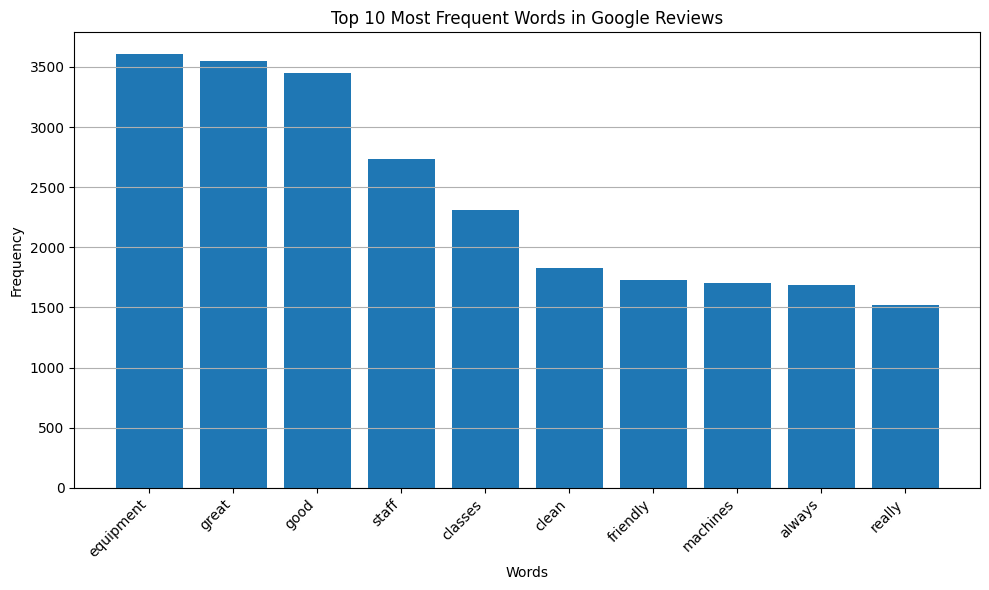

In [ ]:
# Find frequency distribution of works
from nltk import FreqDist

# Flatten the list of words for Google reviews
all_google_words = [word for sublist in ggl_data['cleaned_comment'] for word in sublist]
"""The expression reads like: "For every sublist in the ggl_data['cleaned_comment'],
and for every word in that sublist, add the word to the new list."""

# Calculate frequency distribution for Google reviews
google_freq_dist = FreqDist(all_google_words)

# Get the top 10 most common words and their frequencies
top_10_google_words = google_freq_dist.most_common(10)

print("Top 10 words in Google Reviews:")
print(top_10_google_words)

# Plot the top 10 words for Google reviews
plt.figure(figsize=(10, 6))
google_words, google_counts = zip(*top_10_google_words)
plt.bar(google_words, google_counts)
plt.title('Top 10 Most Frequent Words in Google Reviews')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Top 10 words in Trustpilot Reviews:
[('equipment', 4393), ('good', 4073), ('great', 3789), ('staff', 3561), ('friendly', 2487), ('clean', 2485), ('classes', 2258), ('easy', 2185), ('really', 1750), ('machines', 1750)]


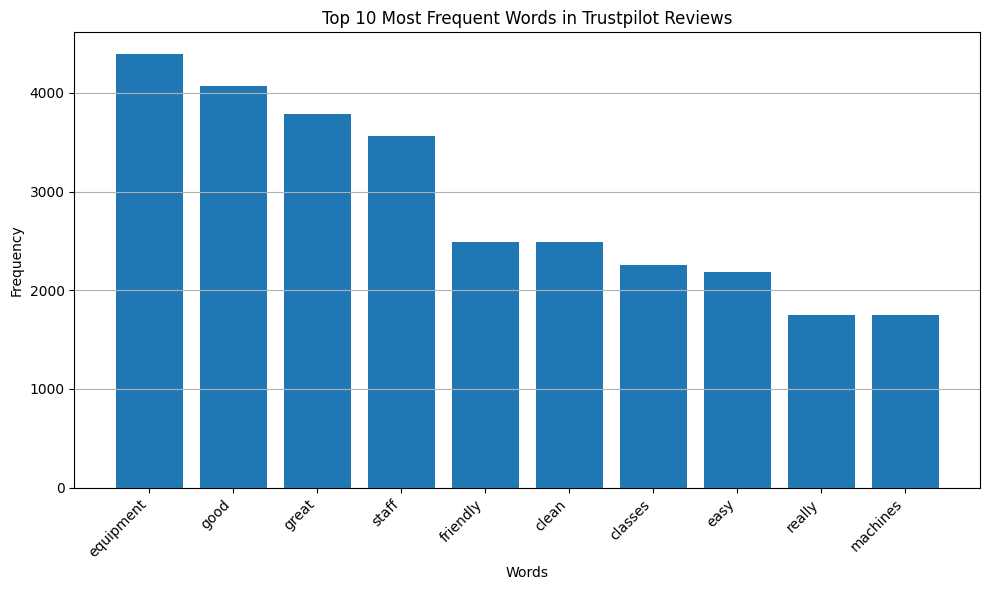

In [ ]:
all_trust_words = [word for sublist in tp_data['cleaned_review_content'] for word in sublist]
trust_freq_dist = FreqDist(all_trust_words)
top_10_trust_words = trust_freq_dist.most_common(10)
print("Top 10 words in Trustpilot Reviews:")
print(top_10_trust_words)

plt.figure(figsize=(10, 6))
trust_words, trust_counts = zip(*top_10_trust_words)
plt.bar(trust_words, trust_counts)
plt.title('Top 10 Most Frequent Words in Trustpilot Reviews')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

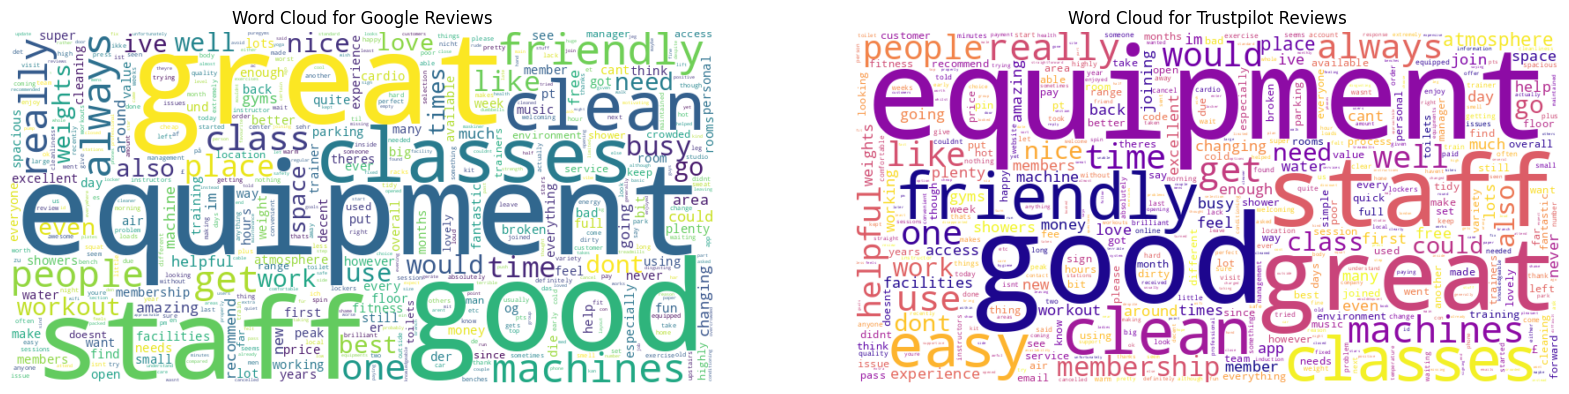

In [ ]:
# Plot wordclouds for both lists
from wordcloud import WordCloud

ggl_wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=500).generate_from_frequencies(google_freq_dist)
plt.figure(figsize=(20, 5))
plt.subplot(1,2,1)
plt.imshow(ggl_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Google Reviews')


tp_wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=500, colormap='plasma').generate_from_frequencies(trust_freq_dist)
plt.subplot(1,2,2)
plt.imshow(tp_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Trustpilot Reviews')
plt.show()

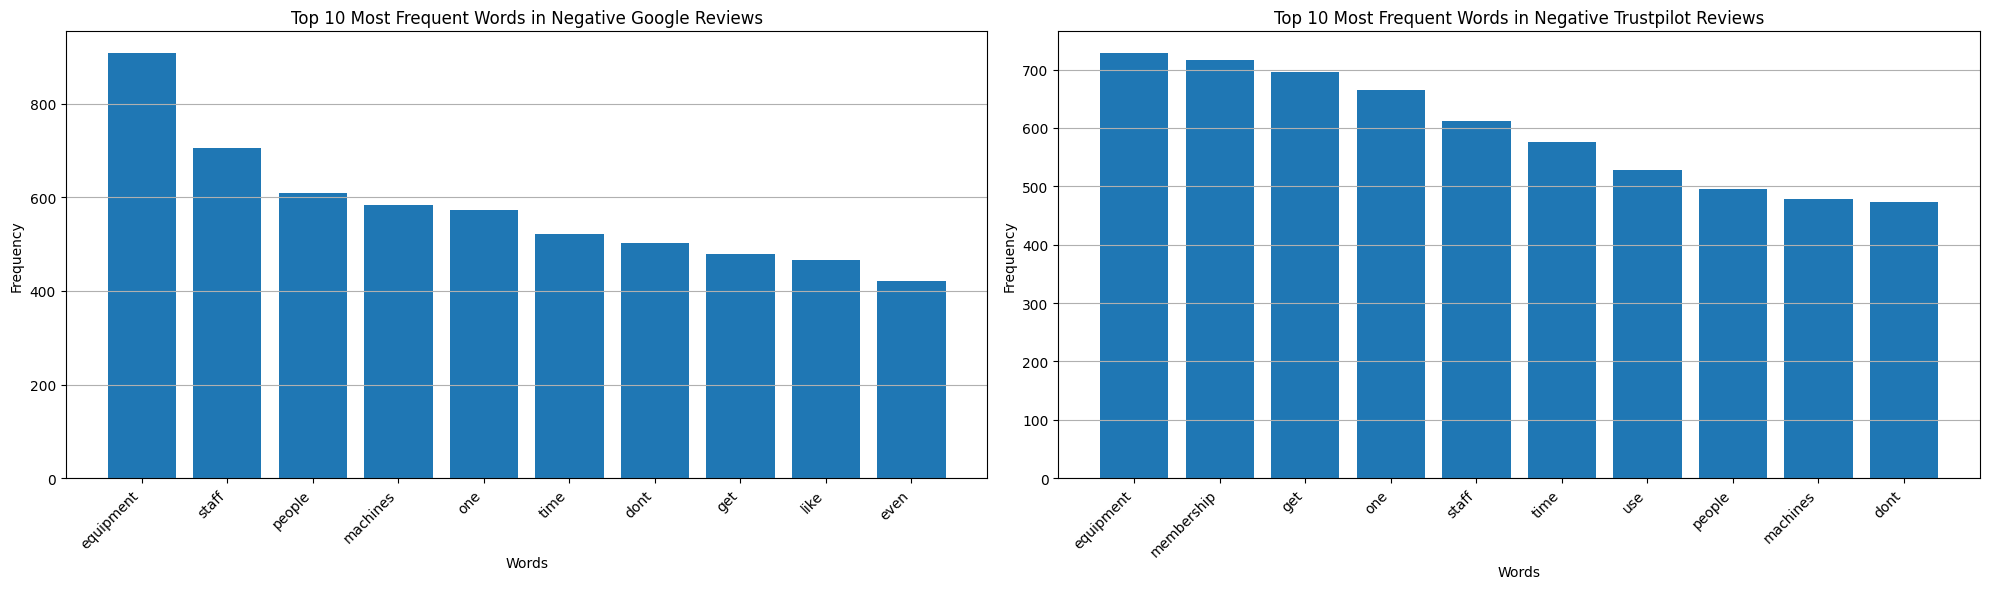

In [ ]:
# get DF of all negative reviews, extract word list, check Distribution, plot top 10 words, make wordcloud

# Extract only the negative reviews
ggl_negative_reviews = ggl_data[ggl_data['Overall Score'] < 3].copy()
tp_negative_reviews = tp_data[tp_data['Review Stars'] < 3].copy()

# Word list
ggl_negative_words = [word for sublist in ggl_negative_reviews['cleaned_comment'] for word in sublist]
tp_negative_words = [word for sublist in tp_negative_reviews['cleaned_review_content'] for word in sublist]

# Distibutions
neg_ggl_freq = FreqDist(ggl_negative_words)
neg_tp_freq = FreqDist(tp_negative_words)

# Plot top 10
top_10_neg_ggl = neg_ggl_freq.most_common(10)
top_10_neg_tp = neg_tp_freq.most_common(10)

plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
neg_ggl_words, neg_ggl_counts = zip(*top_10_neg_ggl)
plt.bar(neg_ggl_words, neg_ggl_counts)
plt.title('Top 10 Most Frequent Words in Negative Google Reviews')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()

plt.subplot(1,2,2)
neg_tp_words, neg_tp_counts = zip(*top_10_neg_tp)
plt.bar(neg_tp_words, neg_tp_counts)
plt.title('Top 10 Most Frequent Words in Negative Trustpilot Reviews')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()

plt.show()

In [ ]:
print("Unique words in negative Google reviews:", len(set(ggl_negative_words)))
print("Unique words in negative Trustpilot reviews:", len(set(tp_negative_words)))

Unique words in negative Google reviews: 12399
Unique words in negative Trustpilot reviews: 9048


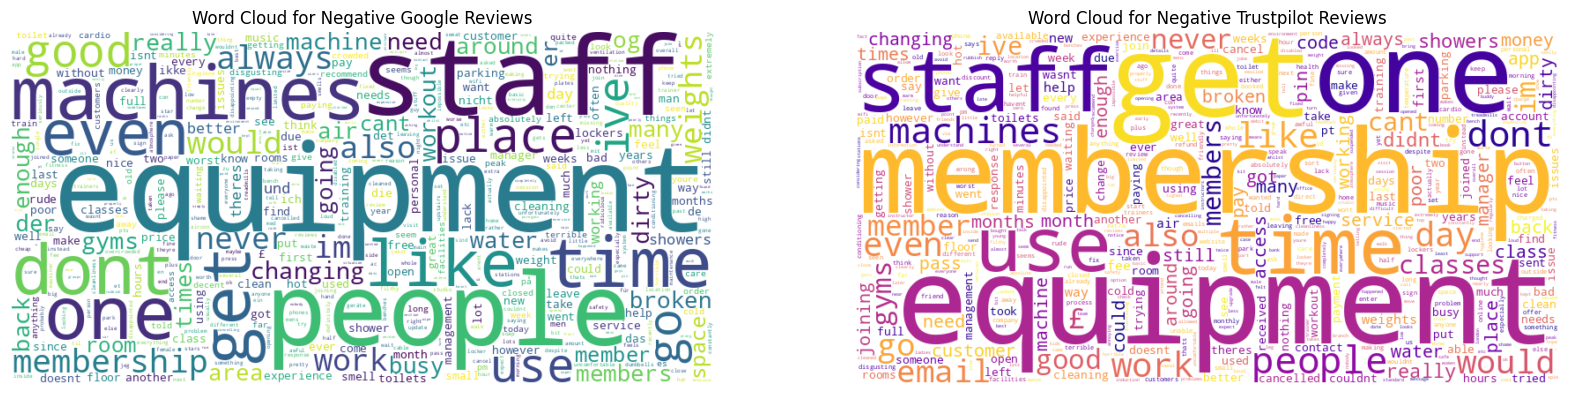

In [ ]:
# Wordcloud
ggl_neg_wordcloud = WordCloud(width= 800, height=400, background_color='white',
                              max_words=500).generate_from_frequencies(neg_ggl_freq)
tp_neg_wordcloud = WordCloud(width=800, height=400, background_color='white',
                             max_words=500, colormap='plasma').generate_from_frequencies(neg_tp_freq)

plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.imshow(ggl_neg_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Google Reviews')

plt.subplot(1,2,2)
plt.imshow(tp_neg_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Trustpilot Reviews')
plt.show()

# Initial Topic modelling

In [ ]:
# Filter out mutual locations for negative reviews
ggl_negative_mutual = ggl_negative_reviews[ggl_negative_reviews["Club's Name"].isin(mutual_locations)].copy()
tp_negative_mutual = tp_negative_reviews[tp_negative_reviews["Location Name"].isin(mutual_locations)].copy()

# Clean the data for BERTopic (only lowercase, punctuation & numbers) >> requires sentences/text, not tokens!
def clean_text_for_bertopic(text):
  if not isinstance(text, str):
    return "" # Return empty string for non-string input
  text = text.lower()
  text = re.sub(r'\d+', '', text)
  text = re.sub(f'[{re.escape(string.punctuation)}\u2019\2018]' , '', text)
  return text

# Apply the pre-processing function
ggl_negative_mutual['bertopic_cleaned'] = ggl_negative_mutual['Comment'].apply(clean_text_for_bertopic)
tp_negative_mutual['bertopic_cleaned'] = tp_negative_mutual['Review Content'].apply(clean_text_for_bertopic)

# Merge reviews to create new list
negative_reviews_for_topic_modeling = pd.concat([ggl_negative_mutual['bertopic_cleaned'],
                                                tp_negative_mutual['bertopic_cleaned']]).tolist()

# Explore newly created list
print(f"Number of negative reviews from mutual locations for topic modelling: {len(negative_reviews_for_topic_modeling)}")
print("\n")
print("First 10 cleaned reviews for topic modelling:")
for i, review in enumerate(negative_reviews_for_topic_modeling[:10]):
  print(f"{i+1}: {review}")

Number of negative reviews from mutual locations for topic modelling: 3947


First 10 cleaned reviews for topic modelling:
1: too many students from two local colleges go her leave rubbish in changing rooms and sit there like there in a canteen been going here for  years will cancel my membership and go to gym group this gym is disgusting students hanging around machines and messing around like there at school too over crowded and their ceo supports the genocide of civilians by israel disgusting people
2: current member

gym is quite dirty more often than not theres no soap in the bathroom there is zero airflow in the gym its like a sauna in here also the gym is often overcrowded anytime after pm

the only good thing about this gym is the  location and the bring your buddy thing
3: this gym is way too hot to even workout in there are no windows open and the ac barely works the staff are no where near friendly they are always rude especially the men just because you have clients doesnt 

In [ ]:
%pip install bertopic
from bertopic import BERTopic

# Instantiate the model
topic_model = BERTopic(language='english')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.6/150.6 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 57.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 47.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 38.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 29.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstallin

In [ ]:
# Fit
topics, probs = topic_model.fit_transform(negative_reviews_for_topic_modeling)

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
# Explore the generated topics & their frequencies
"""Topic -1 is a special topic that represents all outlier documents that were not assigned to any specific cluster.
   Topic -1 usually has the highest document count as it includes outliers.
   Representation column contains a list of the most representative words for each topic,
   ordered by their importance or relevance to the topic (usually based on C-TF-IDF)"""
topic_model.get_topic_info()

# Explore the Frequencies ONLY
# topic_model.get_topic_freq()

Topic  Count                                 Name  \
0      -1   1638                     -1_the_and_to_of   
1       0    200            0_air_conditioning_hot_ac   
2       1    127               1_class_classes_was_to   
3       2    120              2_parking_car_park_free   
4       3    114                  3_pass_day_code_pin   
5       4    113      4_toilets_toilet_changing_rooms   
6       5     93          5_closed_open_christmas_gym   
7       6     91              6_music_loud_hear_noise   
8       7     77           7_membership_fee_my_cancel   
9       8     67               8_membership_to_my_gym   
10      9     64  9_rude_manager_staff_unprofessional   
11     10     60                   10_price_is_the_of   
12     11     57         11_cold_shower_showers_water   
13     12     55            12_equipment_good_its_gym   
14     13     53            13_locker_lockers_my_lock   
15     14     51              14_smell_gym_the_smells   
16     15     48                   15_to_me_was_staff   
17     16     47           16_water_yanga_machine_the   
18     17     46         17_equipment_very_poor_dated   
19     18     45        18_machines_broken_fix_rowing   
20     19     43            19_showers_cold_water_hot   
21     20     42         20_wifi_signal_no_connection   
22     21     40        21_weights_plates_free_people   
23     22     37                 22_worst_ever_gym_in   
24     23     34                23_she_her_me_manager   
25     24     33                 24_never_go_been_nah   
26     25     33           25_showers_are_shower_sort   
27     26     32      26_cleaning_stations_wipe_sweat   
28     27     31          27_toilets_toilet_the_dirty   
29     28     30         28_bench_squat_benches_racks   
30     29     30              29_busy_too_wait_people   
31     30     28       30_overcrowded_crowded_too_cap   
32     31     28        31_showers_shower_dirty_mould   
33     32     26         32_sb_rubbish_expensive_good   
34     33     23        33_cable_machine_machines_are   
35     34     22   34_men_women_section_uncomfortable   
36     35     19                     35_was_me_his_he   
37     36     19         36_kids_phones_full_machines   
38     37     19           37_dirty_very_clean_toilet   
39     38     18           38_gyms_dip_equipment_pure   
40     39     16            39_busy_extremely_too_way   
41     40     15           40_induction_was_he_booked   
42     41     14              41_and_of_northolt_this   
43     42     14              42_stars_star_give_user   
44     43     13        43_lockers_changing_rooms_are   
45     44     13                 44_he_his_trainer_me   
46     45     13      45_ceo_genocide_supports_israel   
47     46     13            46_showers_fix_shower_car   
48     47     12          47_dirty_cleaning_very_dust   
49     48     12           48_chest_machines_ext_delt   
50     49     11      49_filming_taking_camera_photos   
51     50     11           50_busy_too_equipment_wait   
52     51     10             51_password_app_pin_bank   
53     52     10             52_phones_their_on_phone   
54     53     10          53_rules_kids_shirts_policy   
55     54     10  54_weights_equipment_everywhere_old   

                                       Representation  \
0       [the, and, to, of, gym, is, in, for, it, are]   
1   [air, conditioning, hot, ac, is, aircon, the, ...   
2   [class, classes, was, to, the, booked, cancell...   
3   [parking, car, park, free, fine, you, fines, t...   
4   [pass, day, code, pin, didnt, my, paid, for, a...   
5   [toilets, toilet, changing, rooms, dirty, smel...   
6   [closed, open, christmas, gym, hours, on, is, ...   
7   [music, loud, hear, noise, headphones, the, vo...   
8   [membership, fee, my, cancel, account, charged...   
9   [membership, to, my, gym, access, was, month, ...   
10  [rude, manager, staff, unprofessional, very, w...   
11  [price, is, the, of, for, gym, and, to, in, this]   
12  [cold, sh

In [ ]:
# List out the top words for the TOP 2 topics
print("Topic 1:")
display(topic_model.get_topic(0))
print("\n")
print("Topic 2:")
display(topic_model.get_topic(1))

Topic 1:


[('air', np.float64(0.03765847078636213)),
 ('conditioning', np.float64(0.02044751965256088)),
 ('hot', np.float64(0.02000029393672646)),
 ('ac', np.float64(0.017803276754345943)),
 ('is', np.float64(0.017746220575211642)),
 ('aircon', np.float64(0.017103188440707524)),
 ('the', np.float64(0.016922748551488166)),
 ('its', np.float64(0.016867442589472405)),
 ('it', np.float64(0.015517392788706993)),
 ('con', np.float64(0.015155204320490688))]



Topic 2:


[('class', np.float64(0.04967759506895349)),
 ('classes', np.float64(0.03798989061032785)),
 ('was', np.float64(0.017012228434893757)),
 ('to', np.float64(0.01638528238453969)),
 ('the', np.float64(0.014852983146884479)),
 ('booked', np.float64(0.014593384157746374)),
 ('cancelled', np.float64(0.014073432913812817)),
 ('instructor', np.float64(0.014010390054761873)),
 ('and', np.float64(0.0137350435501645)),
 ('instructors', np.float64(0.01370720408874543))]

In [ ]:
# Visualise the Topic distributions
topic_model.visualize_topics()

### **Commentary on the clusters identified:**

This initial analysis and Intertopic distance map have helped identify a number of clusters, presenting us with numerous areas for improvement and further investigation. The topics associated with each clusters are as follow:

*   Cluster 1: Air conditioning and lack of hot water in shower rooms
*   Cluster 2: Membership benefits, gym access times, parking and classes
*   Cluster 3: Dirty Toilets and changing rooms, issues with water dispensers
*   Cluster 4: Poor Gym etiquette - phone use, filming, loud music
*   Cluster 5: Rude and unprofessional staff
*   Cluster 6: Unorganised, Missing or Broken equipment and machines
*   Cluster 7: Overcrowding, Large waiting times for machines and old equipment
*   Cluster 8: Security and storage risks
*   Cluster 9: Low Cleanliness standards
*   Cluster 10: Pricing




In [ ]:
# Visualise the top 5 words each topic
topic_model.visualize_barchart(top_n_topics=50, n_words=5, title="Topic word scores",
                               width=300, height=250)

In [ ]:
# Plot Similarity matrix heatmap
topic_model.visualize_heatmap(width=1000, height=1000)

# Further Investigation


In [ ]:
# List out top 20 locations with the highest number of negative reviews for Google/Trustpilot
ggl_counts = ggl_negative_reviews.groupby("Club's Name").size().reset_index(name="google_review_count")
tp_counts = tp_negative_reviews.groupby("Location Name").size().reset_index(name="trustpilot_review_count")


print("Top 20 locations with the highest number of negative Google reviews:")
display(ggl_counts.sort_values(by="google_review_count", ascending=False).head(20))

print("\nTop 20 locations with the highest number of negative Trustpilot reviews:")
display(tp_counts.sort_values(by="trustpilot_review_count", ascending=False).head(20))

Top 20 locations with the highest number of negative Google reviews:


Club's Name  google_review_count
319          London Stratford                   59
330           London Woolwich                   26
275       London Canary Wharf                   26
285            London Enfield                   25
321      London Swiss Cottage                   24
311      London Palmers Green                   22
124    Birmingham City Centre                   21
303        London Leytonstone                   21
353                New Barnet                   20
137        Bradford Thornbury                   19
380   Peterborough Serpentine                   19
444                 Wakefield                   19
297             London Hoxton                   18
315      London Seven Sisters                   18
445       Walsall Crown Wharf                   18
341  Manchester Exchange Quay                   17
104              Bachenbülach                   17
294              London Hayes                   17
269         London Bermondsey                   16
430       Sutton Times Square                   16


Top 20 locations with the highest number of negative Trustpilot reviews:


Location Name  trustpilot_review_count
155    Leicester Walnut Street                       50
0                          345                       45
186             London Enfield                       23
219           London Stratford                       22
58                     Burnham                       20
171          London Bermondsey                       18
199              London Ilford                       18
188            London Finchley                       16
215       London Seven Sisters                       16
233                 Maidenhead                       16
358                       York                       16
195               London Hayes                       16
221       London Swiss Cottage                       15
261                  Northwich                       15
194  London Hammersmith Palais                       15
19                    Basildon                       14
250                 New Barnet                       14
343        Watford Waterfields                       14
174             London Bromley                       14
30      Birmingham City Centre                       14

### **Commentary on comparing locations:**


In both platforms, 11 of the top 20 are locations in London.

The Google reviews data show that London Stratford, Woolwich, Canary Wharf, Enfield and Swiss Cottage are the top five in terms of customer engagement. We can see a degree of overlap with the top five extracted from the Trustpilot platform, these being: Leicester Walnut Street, Unnamed 345, London Enfield, Stratford and Burnham.

Other common locations across both sets are Birmingham City centre, London Seven Sisters and Bermondsey.


In terms of platform preference, it appears that Trustpilot is more commonly used in the Midlands and smaller towns, where clubs like Leicester Walnut Street and Burnham show strong activity. In contrast, Google reviews tend to dominate in larger cities such as London, Manchester, and Birmingham, suggesting higher engagement through Google in more urban, high-footfall locations.

In [ ]:
# Merge Data
# Step 1: Standardise the columns --- 1 row per review, avoid accidental 5×1 or 3×2 merges (Cartesian Joins)
ggl_mutual_df = ggl_negative_mutual[["Club's Name", "Comment", "Overall Score", "cleaned_comment", "bertopic_cleaned"]].copy()
ggl_mutual_df = ggl_mutual_df.rename(columns={"Club's Name":'Location', "Comment":'Review',
                                              "Overall Score":'Score', "cleaned_comment":'cleaned_review'})
ggl_mutual_df["Source"] = "Google"


tp_mutual_df = tp_negative_mutual[["Location Name", "Review Content", "Review Stars", "cleaned_review_content", "bertopic_cleaned"]].copy()
tp_mutual_df = tp_mutual_df.rename(columns={"Location Name": 'Location', "Review Content":'Review',
                                            "Review Stars":'Score', "cleaned_review_content": 'cleaned_review'})
tp_mutual_df["Source"] = "Trustpilot"


# Step 2: Combine the two datasets
combined_reviews = pd.concat([ggl_mutual_df, tp_mutual_df], ignore_index=True)


# Drop duplicates
combined_reviews.drop_duplicates(subset=["Location", "Review"], inplace=True)

In [ ]:
combined_reviews

Location  \
0       Cambridge Leisure Park   
1           Bristol Union Gate   
2                   New Barnet   
3     Manchester Cheetham Hill   
4       Newcastle Eldon Garden   
...                        ...   
3942    London East India Dock   
3943    Colchester Retail Park   
3944              Cardiff Gate   
3945      Sheffield Millhouses   
3946               London Wall   

                                                 Review  Score  \
0     Too many students from two local colleges go h...      1   
1     (current member)\n\nGym is quite dirty, more o...      1   
2     This gym is way too hot to even workout in. Th...      2   
3     No access for wc 😢.  Empty and no assistance t...      2   
4     After being at this gym for over a year I'm fi...      2   
...                                                 ...    ...   
3942  There are lot of things to improve  There shou...      1   
3943  Not enough weight plates for benches, spent ha...      2   
3944  I've been a member of this gym for about  2 ye...      2   
3945  Millhouses. Sheffield. Showers not warm enough...      2   
3946  It’s an absolute joke, every week it’s either ...      1   

                                         cleaned_review  \
0     [many, students, two, local, colleges, go, lea...   
1     [current, member, quite, dirty, often, theres,...   
2     [way, hot, even, workout, windows, open, ac, b...   
3     [access, wc, 😢, empty, assistance, gain, acces...   
4     [year, im, finally, leaving, im, gutted, staff...   
...                                                 ...   
3942  [lot, things, improve, enough, attachments, eq...   
3943  [enough, weight, plates, benches, spent, half,...   
3944  [ive, member, years, ive, noticed, hygiene, cl...   
3945  [millhouses, sheffield, showers, warm, enough,...   
3946  [absolute, joke, every, week, either, leak, ai...   

                                       bertopic_cleaned      Source  
0     too many students from two local colleges go h...      Google  
1     current member\n\ngym is quite dirty more ofte...      Google  
2     this gym is way too hot to even workout in the...      Google  
3     no access for wc 😢  empty and no assistance to...      Google  
4     after being at this gym for over a year im fin...      Google  
...                                                 ...         ...  
3942  there are lot of things to improve  there shou...  Trustpilot  
3943  not enough weight plates for benches spent hal...  Trustpilot  
3944  ive been a member of this gym for about   year...  Trustpilot  
3945  millhouses sheffield showers not warm enough c...  Trustpilot  
3946  its an absolute joke every week its either a l...  Trustpilot  

[3930 rows x 6 columns]

In [ ]:
# List Location, Reviews per platform and total count for the Top 30 locations
reviews_by_location = combined_reviews.groupby(["Location", "Source"]).size().unstack(fill_value=0)
reviews_by_location["Total"] = reviews_by_location["Google"] + reviews_by_location["Trustpilot"]
reviews_by_location.sort_values(by="Total", ascending=False).head(30)

Source                     Google  Trustpilot  Total
Location                                            
London Stratford               59          22     81
Leicester Walnut Street        11          49     60
London Enfield                 25          23     48
London Swiss Cottage           24          15     39
Birmingham City Centre         21          14     35
New Barnet                     20          14     34
London Seven Sisters           18          16     34
Bradford Thornbury             19          14     33
London Bermondsey              16          17     33
London Hayes                   17          16     33
London Canary Wharf            26           6     32
Burnham                        10          20     30
Walsall Crown Wharf            18          12     30
London Hammersmith Palais      14          15     29
London Finchley                13          16     29
London Muswell Hill            15          12     27
Nottingham Colwick             16          10     26
Maidenhead                     10          16     26
London Hoxton                  18           8     26
Birmingham Beaufort Park       12          14     26
Basildon                       12          14     26
Wakefield                      19           6     25
London Park Royal              15           9     24
London Holborn                 15           9     24
London Leytonstone             21           3     24
London Beckton                 15           9     24
Manchester Exchange Quay       17           6     23
Leicester St Georges Way       10          13     23
Chatham                        14           9     23
London Bromley                  9          14     23

In [ ]:
combined_reviews["Location"].nunique()

309

In [ ]:
# Select data for top 30 locations
top_30_locations = reviews_by_location.sort_values(by="Total", ascending=False).head(30).index
top_reviews_df = combined_reviews[combined_reviews["Location"].isin(top_30_locations)]
top_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 950 entries, 2 to 3941
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Location          950 non-null    object
 1   Review            950 non-null    object
 2   Score             950 non-null    int64 
 3   cleaned_review    950 non-null    object
 4   bertopic_cleaned  950 non-null    object
 5   Source            950 non-null    object
dtypes: int64(1), object(5)
memory usage: 52.0+ KB


In [ ]:
top_reviews_df.head()

Location                                             Review  \
2            New Barnet  This gym is way too hot to even workout in. Th...   
6            New Barnet                       Air-conditioning doesnt work   
14        London Hoxton  Is pure gym staff allowed to blame or annoying...   
15  Walsall Crown Wharf  Absolute filthy toilet and machines, some mach...   
21              Burnham  Overcrowded, full of teenagers who do not look...   

    Score                                     cleaned_review  \
2       2  [way, hot, even, workout, windows, open, ac, b...   
6       1                    [airconditioning, doesnt, work]   
14      1  [staff, allowed, blame, annoying, people, hoxt...   
15      1  [absolute, filthy, toilet, machines, machines,...   
21      1  [overcrowded, full, teenagers, look, plus, wou...   

                                     bertopic_cleaned  Source  
2   this gym is way too hot to even workout in the...  Google  
6                         airconditioning doesnt work  Google  
14  is pure gym staff allowed to blame or annoying...  Google  
15  absolute filthy toilet and machines some machi...  Google  
21  overcrowded full of teenagers who do not look ...  Google

In [ ]:
# Apply Frequencies & create Wordcloud
top_30_text = [word for sublist in top_reviews_df['cleaned_review'] for word in sublist]
top_30_freq = FreqDist(top_30_text)
top_30_freq

FreqDist({'equipment': 278, 'staff': 232, 'people': 230, 'one': 210, 'machines': 208, 'dont': 201, 'time': 192, 'get': 190, 'like': 164, 'even': 150, ...})

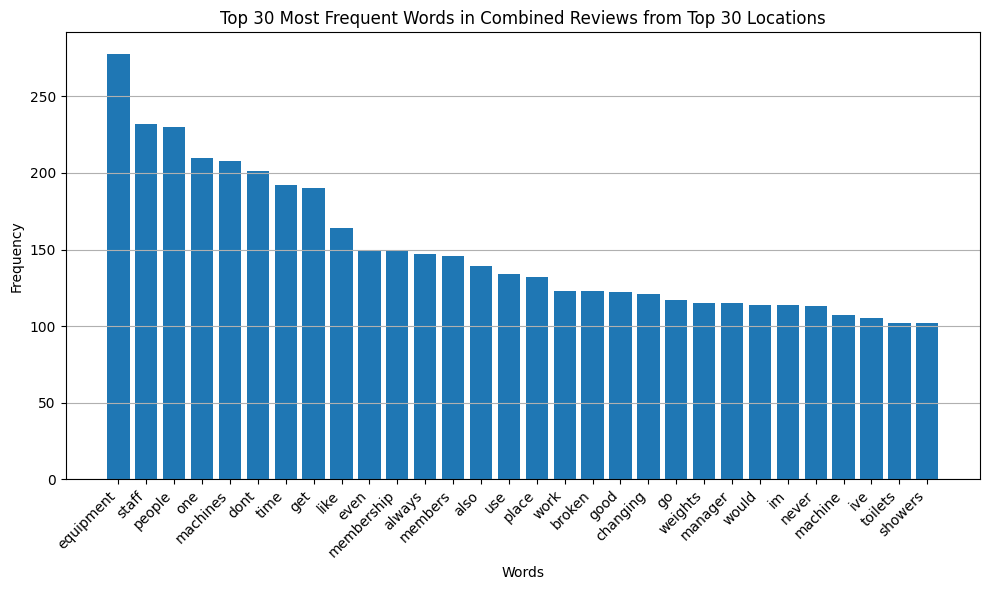

In [ ]:
top_30_word_freq = FreqDist(top_30_text).most_common(30)
word_30_gyms, count_30_gyms = zip(*top_30_word_freq)

plt.figure(figsize=(10, 6))
plt.bar(word_30_gyms, count_30_gyms)
plt.title('Top 30 Most Frequent Words in Combined Reviews from Top 30 Locations')
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha="right")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

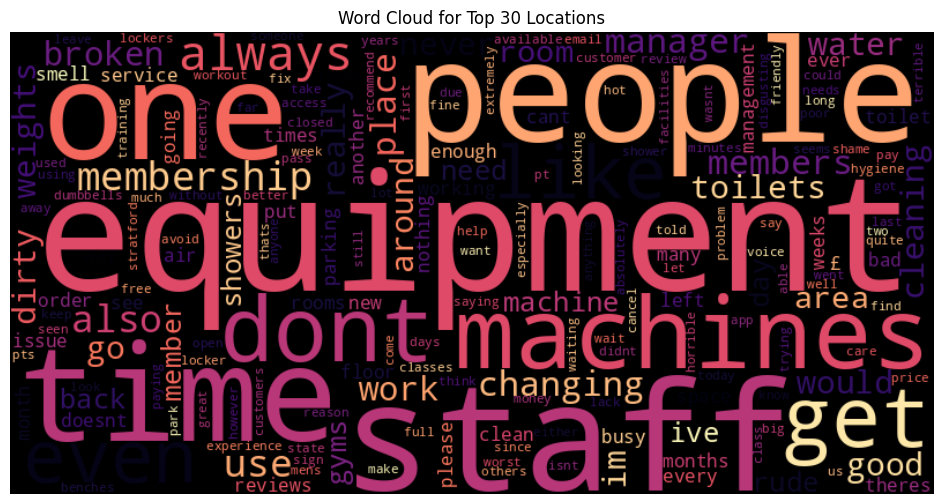

In [ ]:
wordcloud_30 = WordCloud(width=800, height=400, background_color='black', colormap='magma').generate_from_frequencies(top_30_freq)
plt.figure(figsize=(12,6))
plt.imshow(top_30_gyms, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for Top 30 Locations")
plt.show()

### Comparing results to Initial topic modelling

The newly generated word frequency distribution and wordcloud for the top 30 locations reitterate the issues identified during the initial data exploration. This is demonstrated by top words such as: equipment, staff, people, machines, broken, time, membership, toilet etc.

In [ ]:
# Fit BERTopic
topic_30, probs_30 = topic_model.fit_transform(combined_reviews['bertopic_cleaned'])

In [ ]:
topic_model.get_topic_info()

Topic  Count                                  Name  \
0      -1   1446                     -1_the_and_to_gym   
1       0    272           0_showers_shower_cold_water   
2       1    197             1_air_conditioning_hot_is   
3       2    146                   2_pass_pin_code_day   
4       3    125                3_class_classes_was_to   
5       4    119               4_parking_car_park_free   
6       5    117       5_toilets_toilet_changing_dirty   
7       6     91          6_music_loud_hear_headphones   
8       7     83            7_membership_fee_my_cancel   
9       8     82         8_closed_open_christmas_hours   
10      9     65                     9_price_is_the_of   
11     10     62  10_rude_manager_staff_unprofessional   
12     11     58              11_equipment_gym_its_you   
13     12     55               12_to_membership_gym_my   
14     13     54               13_smell_gym_smells_the   
15     14     50                  14_to_help_was_staff   
16     15     50                      15_she_her_he_to   
17     16     49           16_locker_lockers_my_stolen   
18     17     46           17_weights_plates_kg_people   
19     18     46            18_water_yanga_machine_the   
20     19     44         19_cleaning_stations_wipe_and   
21     20     43     20_equipment_equipments_very_poor   
22     21     41         21_machines_broken_fix_rowing   
23     22     41          22_wifi_signal_no_connection   
24     23     33                 23_worst_ever_gym_ive   
25     24     32           24_toilets_toilet_the_clean   
26     25     31            25_busy_too_crowded_people   
27     26     31          26_bench_benches_press_squat   
28     27     30                  27_never_go_been_nah   
29     28     29               28_men_women_me_section   
30     29     28          29_sb_rubbish_expensive_good   
31     30     25        30_crowded_overcrowded_too_cap   
32     31     24           31_rules_staff_filming_they   
33     32     22         32_cable_machine_machines_are   
34     33     21       33_lockers_locker_changing_room   
35     34     20                      34_was_me_he_his   
36     35     19                    35_of_and_the_this   
37     36     19          36_kids_phones_full_machines   
38     37     19                37_dirty_clean_no_very   
39     38     17          38_gyms_equipment_other_pure   
40     39     17        39_chest_machines_machine_delt   
41     40     17             40_busy_too_extremely_way   
42     41     14        41_machines_broken_out_running   
43     42     14            42_busy_too_equipment_wait   
44     43     13       43_ceo_genocide_supports_israel   
45     44     13             44_stars_star_give_always   
46     45     13            45_induction_was_he_booked   
47     46     13                 46_puregym_been_it_of   
48     47     12                      47_the_of_and_to   
49     48     11  48_cleaning_equipment_needs_stations   
50     49     11                 49_closed_gym_is_will   

                                       Representation  \
0       [the, and, to, gym, of, is, in, for, are, it]   
1   [showers, shower, cold, water, the, hot, are, ...   
2   [air, conditioning, hot, is, the, ac, its, air...   
3   [pass, pin, code, day, didnt, my, to, access, ...   
4   [class, classes, was, to, the, booked, and, ca...   
5   [parking, car, park, free, fine, you, to, fine...   
6   [toilets, toilet, changing, dirty, soap, rooms...   
7   [music, loud, hear, headphones, the, noise, vo...   
8   [membership, fee, my, cancel, charged, account...   
9   [closed, open, christmas, hours, day, on, open...   
10  [price, is, the, of, gym, for, and, to, in, have]   
11  [rude, manager, staff, unprofessional, was, ve...   
12  [equipment, gym, its, you, if, good, but, too,...   
13  [to, membership, gym, my, you, access, month, ...   
14  [smell, gym, smells, the, is, and, in, you, ve...   
15  [to, help, was, staff, me, get, no, the, gym, ...   
16  [she, her, he,

Seeing as some of the top words for the topics are very common stopwords, BERTopic was re-initialised with a CountVectorizer that ignores these stopwords, so that it can focus on more meaningful and informative topics.



In [ ]:
# Update BERTopic model to not track stopwords
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words="english")
topic_model = BERTopic(language="english", vectorizer_model=vectorizer)

In [ ]:
# Re-fit the new BERTopic instance
topic_30, probs_30 = topic_model.fit_transform(top_reviews_df['bertopic_cleaned'])

In [ ]:
topic_model.get_topic_info()

Topic  Count                                Name  \
0      -1    251    -1_gym_equipment_machines_people   
1       0    146       0_gym_toilets_cleaning_toilet   
2       1    130       1_gym_email_closed_membership   
3       2    101            2_manager_gym_rude_staff   
4       3     73     3_machines_people_equipment_gym   
5       4     40            4_parking_car_free_fines   
6       5     38           5_air_gym_conditioning_ac   
7       6     38  6_broken_equipment_busy_equipments   
8       7     36           7_lockers_locker_room_gym   
9       8     31         8_showers_shower_cold_order   
10      9     21          9_showers_shower_gym_water   
11     10     17  10_class_classes_booked_instructor   
12     11     17       11_water_sports_yanga_machine   
13     12     11     12_weights_upstairs_set_putting   

                                       Representation  \
0   [gym, equipment, machines, people, just, dont,...   
1   [gym, toilets, cleaning, toilet, dirty, changi...   
2   [gym, email, closed, membership, pin, day, pas...   
3   [manager, gym, rude, staff, member, puregym, m...   
4   [machines, people, equipment, gym, machine, bu...   
5   [parking, car, free, fines, park, reg, fine, w...   
6   [air, gym, conditioning, ac, hot, aircon, faci...   
7   [broken, equipment, busy, equipments, machines...   
8   [lockers, locker, room, gym, bags, broken, peo...   
9   [showers, shower, cold, order, office, working...   
10  [showers, shower, gym, water, mould, fix, park...   
11  [class, classes, booked, instructor, cancel, c...   
12  [water, sports, yanga, machine, broken, pay, f...   
13  [weights, upstairs, set, putting, place, disor...   

                                  Representative_Docs  
0   [ive been a member at this gym for over  years...  
1   [truly abysmal gym in hayes im paying almost £...  
2   [yellowonblue qr codes on the wall didnt work ...  
3   [avoid this gym if you want to exercise in a f...  
4   [🚫avoid🚫 at  in the morning there are almost  ...  
5   [get free parking there in the car park it wou...  
6   [theres a good amount of potential for this gy...  
7   [too busy  no equipment is free need to wait f...  
8   [it can be hit or miss with these gyms  i rejo...  
9   [the showers are out of order, showers not wor...  
10  [ stars might be harsh because i am rating on ...  
11  [ive been with this gym for a few weeks now an...  
12  [one of the worst puregym the fountain is brok...  
13  [i have been going to this gym for over  years...

In [ ]:
topic_model.visualize_barchart(top_n_topics=50, n_words=5, title="Topic word scores",
                               width=300, height=250)

The second run of BERTopic has narrowed down the key topics to 12, in contrast to the prior, more granular representation. This is in line with the clusters identified earlier.

In particular, this run highlights issues such as gym associated parking fines and Class booking & cancellation problems.

# Emotion Analysis

In [ ]:
# Import necessary modules for Emotion analysis & LLM
from transformers import pipeline, AutoModelForCausalLM, AutoTokenizer
import torch
# Alternative: can use TensofFlow >>> TFAutoModelForCausalLM

In [ ]:
# Initialise the emotion classification pipeline
emotion_classifier = pipeline(
    task="text-classification",
    model="bhadresh-savani/bert-base-uncased-emotion",
    return_all_scores=True,
    device=0, # Device codes -- GPU: = 0,1,cuda:0,cuda:1 // CPU: =-1,cpu
    truncation=True # To handle reviews longer than the model's max sequence length
)

config.json:   0%|          | 0.00/935 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/285 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cpu


In [ ]:
# Using a sample from the reviews as a test sentence
test_sentence = combined_reviews['Review'][91]
test_sentence

'Meh average gym has all the equipment other gyms do but the price is extortionate for what it is. I am paying 13.99 for my gym even with petrol costs considered they want 18.99 for “off peak hours” £25.00 for “24/7”. My 13.99 includes 24 hour access what is this off peak rubbish? I emailed saying hey I’ll do 13.99 & with it being a closer gym I gain something they said no so their loss. I tried the gym for a day pass which is extortionate ever heard of a free trial guys? Because my gym has that & I became a member since 2014 there’s nothing here that my gym doesn’t have & for £25.00 you are simply having a laugh.'

In [ ]:
emotion_classifier(test_sentence)

[[{'label': 'sadness', 'score': 0.005296315066516399},
  {'label': 'joy', 'score': 0.05633363127708435},
  {'label': 'love', 'score': 0.003041642950847745},
  {'label': 'anger', 'score': 0.9323080778121948},
  {'label': 'fear', 'score': 0.0015175188891589642},
  {'label': 'surprise', 'score': 0.001502811792306602}]]

In [ ]:
# Apply the emotion classifier, a list of strings is required by the pipeline

# Run a test with n-rows
emotions = emotion_classifier(combined_reviews['Review'][:100].tolist())

#10 took 3s
#100 took 34s

In [ ]:
# Review output
emotions

[[{'label': 'sadness', 'score': 0.0032429806888103485},
  {'label': 'joy', 'score': 0.00041241711005568504},
  {'label': 'love', 'score': 0.0006547310040332377},
  {'label': 'anger', 'score': 0.9948727488517761},
  {'label': 'fear', 'score': 0.0004546803538687527},
  {'label': 'surprise', 'score': 0.0003623773227445781}],
 [{'label': 'sadness', 'score': 0.9932739734649658},
  {'label': 'joy', 'score': 0.0003415989631321281},
  {'label': 'love', 'score': 0.0002383817482041195},
  {'label': 'anger', 'score': 0.0030412026681005955},
  {'label': 'fear', 'score': 0.0028699056711047888},
  {'label': 'surprise', 'score': 0.00023495739151258022}],
 [{'label': 'sadness', 'score': 0.0003614531015045941},
  {'label': 'joy', 'score': 0.0005682644550688565},
  {'label': 'love', 'score': 0.0012347951997071505},
  {'label': 'anger', 'score': 0.9970333576202393},
  {'label': 'fear', 'score': 0.0004110309819225222},
  {'label': 'surprise', 'score': 0.0003911394451279193}],
 [{'label': 'sadness', 'score

In [ ]:
# Extract top emotion for each review
top_emotions = [max(e, key=lambda x: x['score'])['label'] for e in emotions]

In [ ]:
top_emotions

['anger',
 'sadness',
 'anger',
 'sadness',
 'anger',
 'anger',
 'anger',
 'anger',
 'anger',
 'anger',
 'joy',
 'joy',
 'anger',
 'joy',
 'anger',
 'anger',
 'sadness',
 'anger',
 'joy',
 'sadness',
 'anger',
 'fear',
 'anger',
 'joy',
 'joy',
 'anger',
 'sadness',
 'sadness',
 'sadness',
 'sadness',
 'joy',
 'sadness',
 'joy',
 'fear',
 'sadness',
 'sadness',
 'anger',
 'joy',
 'anger',
 'surprise',
 'anger',
 'joy',
 'fear',
 'anger',
 'sadness',
 'sadness',
 'anger',
 'fear',
 'sadness',
 'joy',
 'anger',
 'anger',
 'anger',
 'anger',
 'sadness',
 'joy',
 'sadness',
 'anger',
 'sadness',
 'anger',
 'love',
 'anger',
 'sadness',
 'joy',
 'sadness',
 'sadness',
 'sadness',
 'sadness',
 'sadness',
 'sadness',
 'anger',
 'love',
 'joy',
 'joy',
 'anger',
 'anger',
 'sadness',
 'anger',
 'anger',
 'anger',
 'sadness',
 'sadness',
 'anger',
 'sadness',
 'sadness',
 'anger',
 'sadness',
 'anger',
 'anger',
 'anger',
 'anger',
 'anger',
 'anger',
 'sadness',
 'anger',
 'joy',
 'joy',
 'ang

In [ ]:
# Final product for full dataset
# 25min to process, no GPU

# Set a batch size for processing
batch_size = 100

# Empty list to store the results
all_emotions = []

# Iterate through the reviews in batches
for i in range(0, len(combined_reviews), batch_size):
    batch_reviews = combined_reviews['Review'][i:i + batch_size].tolist()
    batch_emotions = emotion_classifier(batch_reviews)
    all_emotions.extend(batch_emotions)

# Extract the top emotion for each review from the batched results
combined_reviews["Top_Emotion"] = [max(e, key=lambda x: x['score'])['label'] for e in all_emotions]

# Display the DF's new emotions column
display(combined_reviews.head())

Location  \
0    Cambridge Leisure Park   
1        Bristol Union Gate   
2                New Barnet   
3  Manchester Cheetham Hill   
4    Newcastle Eldon Garden   

                                              Review  Score  \
0  Too many students from two local colleges go h...      1   
1  (current member)\n\nGym is quite dirty, more o...      1   
2  This gym is way too hot to even workout in. Th...      2   
3  No access for wc 😢.  Empty and no assistance t...      2   
4  After being at this gym for over a year I'm fi...      2   

                                      cleaned_review  \
0  [many, students, two, local, colleges, go, lea...   
1  [current, member, quite, dirty, often, theres,...   
2  [way, hot, even, workout, windows, open, ac, b...   
3  [access, wc, 😢, empty, assistance, gain, acces...   
4  [year, im, finally, leaving, im, gutted, staff...   

                                    bertopic_cleaned  Source Top_Emotion  
0  too many students from two local colleges go h...  Google       anger  
1  current member\n\ngym is quite dirty more ofte...  Google     sadness  
2  this gym is way too hot to even workout in the...  Google       anger  
3  no access for wc 😢  empty and no assistance to...  Google     sadness  
4  after being at this gym for over a year im fin...  Google       anger

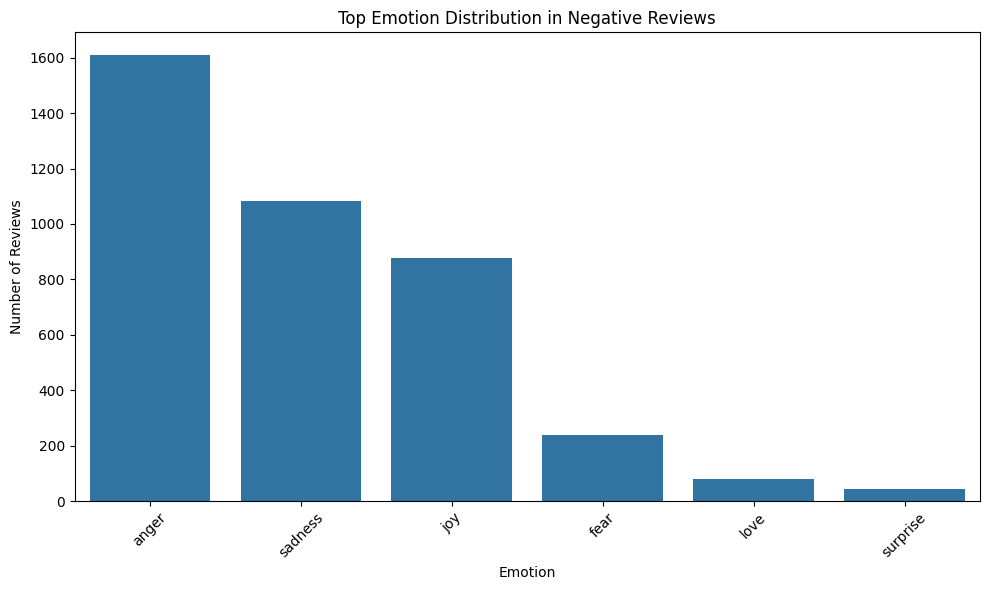

In [ ]:
# Show the top emotion distributions for all negative reviews in both data sets
plt.figure(figsize=(10, 6))
sns.countplot(data=combined_reviews, x="Top_Emotion", order=combined_reviews["Top_Emotion"].value_counts().index)
plt.title("Top Emotion Distribution in Negative Reviews")
plt.xticks(rotation=45)
plt.xlabel("Emotion")
plt.ylabel("Number of Reviews")
plt.tight_layout()
plt.show()

In [ ]:
angry_reviews = combined_reviews[combined_reviews["Top_Emotion"] == "anger"]
angry_reviews

Location  \
0                Cambridge Leisure Park   
2                            New Barnet   
4                Newcastle Eldon Garden   
5                           London Oval   
6                            New Barnet   
...                                 ...   
3928  Cheshunt Brookfield Shopping Park   
3929           Manchester Bury New Road   
3934                            Burnham   
3935                Southampton Central   
3943             Colchester Retail Park   

                                                 Review  Score  \
0     Too many students from two local colleges go h...      1   
2     This gym is way too hot to even workout in. Th...      2   
4     After being at this gym for over a year I'm fi...      2   
5     The gym is huge but where is all the equipment...      1   
6                          Air-conditioning doesnt work      1   
...                                                 ...    ...   
3928                               Not enough equipment      2   
3929  Needs periodic maintenance of sports equipment...      1   
3934  Don’t recommend this gym . There is a PT Jelen...      1   
3935  I’ve gone in once since I restarted my members...      1   
3943  Not enough weight plates for benches, spent ha...      2   

                                         cleaned_review  \
0     [many, students, two, local, colleges, go, lea...   
2     [way, hot, even, workout, windows, open, ac, b...   
4     [year, im, finally, leaving, im, gutted, staff...   
5     [huge, equipment, could, easily, fit, double, ...   
6                       [airconditioning, doesnt, work]   
...                                                 ...   
3928                                [enough, equipment]   
3929  [needs, periodic, maintenance, sports, equipme...   
3934  [dont, recommend, pt, jelena, rude, members, o...   
3935  [ive, gone, since, restarted, membership, give...   
3943  [enough, weight, plates, benches, spent, half,...   

                                       bertopic_cleaned      Source  \
0     too many students from two local colleges go h...      Google   
2     this gym is way too hot to even workout in the...      Google   
4     after being at this gym for over a year im fin...      Google   
5     the gym is huge but where is all the equipment...      Google   
6                           airconditioning doesnt work      Google   
...                                                 ...         ...   
3928                               not enough equipment  Trustpilot   
3929  needs periodic maintenance of sports equipment...  Trustpilot   
3934  dont recommend this gym  there is a pt jelena ...  Trustpilot   
3935  ive gone in once since i restarted my membersh...  Trustpilot   
3943  not enough weight plates for benches spent hal...  Trustpilot   

     Top_Emotion  
0          anger  
2          anger  
4          anger  
5          anger  
6          anger  
...          ...  
3928       anger  
3929       anger  
3934       anger  
3935       anger  
3943       anger  

[1611 rows x 7 columns]

In [ ]:
# Apply BERTopic
angry_topic = topic_model.fit_transform(angry_reviews['bertopic_cleaned'])

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
topic_model.get_topic_info()

Topic  Count                                 Name  \
0      -1    577                     -1_the_and_to_of   
1       0    110               0_my_membership_to_for   
2       1     89      1_the_changing_smell_disgusting   
3       2     68                  2_pass_day_pin_code   
4       3     58                     3_she_her_to_and   
5       4     54  4_rude_manager_staff_unprofessional   
6       5     50     5_class_classes_cancelled_booked   
7       6     47              6_parking_car_park_fine   
8       7     42               7_cleaning_the_gym_and   
9       8     40                 8_nie_never_mao_jest   
10      9     38          9_cold_showers_shower_water   
11     10     37         10_showers_cold_shower_water   
12     11     36            11_air_ac_conditioning_is   
13     12     35           12_music_loud_classes_hear   
14     13     34          13_closed_open_christmas_on   
15     14     34                    14_to_was_help_me   
16     15     28         15_equipment_too_enough_busy   
17     16     27          16_gym_equipment_people_too   
18     17     27          17_lockers_my_stolen_locker   
19     18     26        18_machines_fix_order_machine   
20     19     24            19_gym_equipment_gyms_its   
21     20     23                 20_puregym_to_is_the   
22     21     16                21_worst_ever_gym_ive   
23     22     15         22_phones_people_their_there   
24     23     14          23_weights_kg_the_extremely   
25     24     13                  24_gym_it_closed_is   
26     25     13             25_water_pay_machine_the   
27     26     12      26_ceo_genocide_israel_supports   
28     27     12                  27_to_the_staff_its   
29     28     12           28_wifi_signal_internet_no   

                                       Representation  \
0     [the, and, to, of, is, gym, in, are, for, this]   
1   [my, membership, to, for, month, and, you, me,...   
2   [the, changing, smell, disgusting, rooms, toil...   
3   [pass, day, pin, code, didnt, paid, for, to, w...   
4   [she, her, to, and, me, was, the, this, my, that]   
5   [rude, manager, staff, unprofessional, very, a...   
6   [class, classes, cancelled, booked, to, the, a...   
7   [parking, car, park, fine, you, to, free, the,...   
8   [cleaning, the, gym, and, is, stations, to, of...   
9   [nie, never, mao, jest, sprztu, trenowaem, go,...   
10  [cold, showers, shower, water, hot, freezing, ...   
11  [showers, cold, shower, water, the, gym, is, a...   
12  [air, ac, conditioning, is, the, in, its, to, ...   
13  [music, loud, classes, hear, the, is, noise, p...   
14  [closed, open, christmas, on, day, gym, is, it...   
15  [to, was, help, me, staff, gym, and, the, no, ...   
16  [equipment, too, enough, busy, equipments, way...   
17  [gym, equipment, people, too, wait, busy, is, ...   
18  [lockers, my, stolen, locker, and, inside, loc...   
19  [machines, fix, order, machine, been, out, wor...   
20  [gym, equipment, gyms, its, but, of, is, the, ...   
21  [puregym, to, is, the, and, in, for, gym, of, as]   
22  [worst, ever, gym, ive, london, in, equipment,...   
23  [phones, people, their, there, equipment, are,...   
24  [weights, kg, the, extremely, plates, bench, e...   
25  [gym, it, closed, is, the, has, to, and, for, ...   
26  [water, pay, machine, the, sports, for, last, ...   
27  [ceo, genocide, israel, supports, children, of...   
28  [to, the, staff, its, and, their, rules, gym, ...   
29  [wifi, signal, internet, no, is, the, dirty, w...   

                                  Representative_Docs  
0   [standard pure gym and you get what you pay fo...  
1   [i am extremely disappointed with my joining e...  
2   [previously a member of puregym harbourside on...  
3   [you sent the pin too late i waited for over a...  
4   [was looking to change from my regular pure gy...  
5   [very rude staff especially management , the m...  
6   [lazy staff   ive just cancelled my membership...  
7   [as several othe

In [ ]:
topic_model.visualize_topics()

### **Commentary:**
Emotion analysis identified over 1600 reviews where **anger** was the top emotion. Processing the angry reviews with BERTopic produced clusters showcasing that the main caused for anger are:

* Showers & Air conditioning
* Membership & Day pass access
* Equipment, Parking fines, Opening times
* Cleanliness & Hygiene of changing rooms
* Unhelpful Staff & security problems


 We can summarise that anger was often linked to poor customer service, faulty equipment, and issues around billing or memberships.

In [ ]:
topic_model.visualize_barchart(top_n_topics=15)

# Using an LLM

Using Phi-4 Mini: https://huggingface.co/microsoft/Phi-4-mini-instruct

Prompts for Phi-4:

- In the following customer review, pick out the main 3 topics. Return them in a numbered list format, with each one on a new line.


- For the following text topics obtained from negative customer reviews, can you give some actionable insights that would help
this gym company?

In [ ]:
# Export combined data
combined_reviews.to_pickle('combined_reviews.pkl')

In [ ]:
# Import
combined_reviews = pd.read_pickle('combined_reviews.pkl')
combined_reviews.head()

Location  \
0    Cambridge Leisure Park   
1        Bristol Union Gate   
2                New Barnet   
3  Manchester Cheetham Hill   
4    Newcastle Eldon Garden   

                                              Review  Score  \
0  Too many students from two local colleges go h...      1   
1  (current member)\n\nGym is quite dirty, more o...      1   
2  This gym is way too hot to even workout in. Th...      2   
3  No access for wc 😢.  Empty and no assistance t...      2   
4  After being at this gym for over a year I'm fi...      2   

                                      cleaned_review  \
0  ['many', 'students', 'two', 'local', 'colleges...   
1  ['current', 'member', 'quite', 'dirty', 'often...   
2  ['way', 'hot', 'even', 'workout', 'windows', '...   
3  ['access', 'wc', '😢', 'empty', 'assistance', '...   
4  ['year', 'im', 'finally', 'leaving', 'im', 'gu...   

                                    bertopic_cleaned  Source Top_Emotion  
0  too many students from two local colleges go h...  Google       anger  
1  current member\n\ngym is quite dirty more ofte...  Google     sadness  
2  this gym is way too hot to even workout in the...  Google       anger  
3  no access for wc 😢  empty and no assistance to...  Google     sadness  
4  after being at this gym for over a year im fin...  Google       anger

In [ ]:
angry_reviews = combined_reviews[combined_reviews["Top_Emotion"] == "anger"].copy()
angry_reviews.head()

Location                                             Review  \
0  Cambridge Leisure Park  Too many students from two local colleges go h...   
2              New Barnet  This gym is way too hot to even workout in. Th...   
4  Newcastle Eldon Garden  After being at this gym for over a year I'm fi...   
5             London Oval  The gym is huge but where is all the equipment...   
6              New Barnet                       Air-conditioning doesnt work   

   Score                                     cleaned_review  \
0      1  ['many', 'students', 'two', 'local', 'colleges...   
2      2  ['way', 'hot', 'even', 'workout', 'windows', '...   
4      2  ['year', 'im', 'finally', 'leaving', 'im', 'gu...   
5      1  ['huge', 'equipment', 'could', 'easily', 'fit'...   
6      1              ['airconditioning', 'doesnt', 'work']   

                                    bertopic_cleaned  Source Top_Emotion  
0  too many students from two local colleges go h...  Google       anger  
2  this gym is way too hot to even workout in the...  Google       anger  
4  after being at this gym for over a year im fin...  Google       anger  
5  the gym is huge but where is all the equipment...  Google       anger  
6                        airconditioning doesnt work  Google       anger

In [ ]:
from transformers import pipeline, AutoModelForCausalLM, AutoTokenizer
import torch
torch.random.manual_seed(0)

# Instantiate Model
phi_4 = AutoModelForCausalLM.from_pretrained(
     "microsoft/Phi-4-mini-instruct",
     torch_dtype="auto",
     trust_remote_code=True,
     device_map="auto" # or specify 'cuda' or 'cpu'
     )

# Model tokenizer
phi_4_tokenizer = AutoTokenizer.from_pretrained(
    "microsoft/Phi-4-mini-instruct",
    trust_remote_code=True)

# Model pipeline
phi4_pipeline = pipeline("text-generation",
                     model=phi_4,
                     tokenizer=phi_4_tokenizer,
                     trust_remote_code=True,
                     max_new_tokens=1000,
                     do_sample=False)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

configuration_phi3.py: 0.00B [00:00, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Phi-4-mini-instruct:
- configuration_phi3.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_phi3.py: 0.00B [00:00, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Phi-4-mini-instruct:
- modeling_phi3.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


model.safetensors.index.json: 0.00B [00:00, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.90G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/2.77G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/168 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json:   0%|          | 0.00/15.5M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/249 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/587 [00:00<?, ?B/s]

Device set to use cuda:0
The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Due to hardware limitations, the topic extraction using Phi-4 was done on a sample of the Angry reviews data = 256.

In [ ]:
### Phi-4 Topic Extraction with Pipeline ###
# Ran for 4h and was disconnected... processed about 2500 rows

# Prompt structure
def build_prompt(review_text):
    return f"""<|user|>
In the following customer review, pick out the main 3 topics. Return them in a numbered list format, with each one on a new line.

Review:
{review_text}
<|assistant|>"""

# Batch processor with output handling
def extract_phi_topics(review_series, batch_size=10):
    results = []
    # Process only non-null reviews
    non_null_reviews = review_series.dropna()
    original_indices = non_null_reviews.index.tolist()
    review_list = non_null_reviews.tolist()

    for i in range(0, len(review_list), batch_size):
        batch = review_list[i:i+batch_size]
        prompts = [build_prompt(r) for r in batch]
        batch_indices = original_indices[i:i+len(batch)] # Get indices for the current batch

        try:
            outputs = phi4_pipeline(prompts)
            # Verify the output is a populated list with a key before extraction
            for j, out_list in enumerate(outputs):
                if isinstance(out_list, list) and len(out_list) > 0 and 'generated_text' in out_list[0]:
                    # Extract the text and split by the assistant token
                    full_generated_text = out_list[0]['generated_text']
                    if "<|assistant|>" in full_generated_text:
                         text = full_generated_text.split("<|assistant|>")[-1].strip()
                    else:
                        # If the assistant token is not in the output, get the whole generated text
                        text = full_generated_text.strip()
                else:
                    text = "Error: Could not extract generated text"
                    print(f"Warning: Unexpected pipeline output format for batch index {j}: {out_list}")

                results.append((batch_indices[j], text)) # Store as (index, result) tuple

        except Exception as e:
            print(f"Error processing batch starting at index {i}: {e}")
            # Append error messages for each review in the batch to maintain alignment
            for idx in batch_indices:
                 results.append((idx, f"Error: {e}"))


    # Convert the list of (index, result) tuples to a pandas Series with the correct index
    # Ensuring all original non-null indices are covered in the results
    result_series = pd.Series(dict(results))
    return result_series


# --- Dataset options ---

# OPTION 1: Sample data for testing > worked
## reviews_to_process = combined_reviews["Review"].dropna().sample(20, random_state=42)
## print(f"Processing a sample of {len(reviews_to_process)} reviews...")


# OPTION 2: Full dataset > crashed/timeout
## reviews_to_process = combined_reviews["Review"]
## print(f"Processing the full dataset of {len(reviews_to_process.dropna())} reviews...")


# OPTION 3: Angry reviews sample
reviews_to_process = angry_reviews["Review"].sample(256, random_state=42)
print(f"Processing {len(reviews_to_process.dropna())} angry reviews...")



# Run the process
phi_topics_results = extract_phi_topics(reviews_to_process, batch_size=16)

# Create the new column and assign results back to the DataFrame
if 'Phi_Topics' not in combined_reviews.columns:
    combined_reviews['Phi_Topics'] = None

combined_reviews.loc[phi_topics_results.index, "Phi_Topics"] = phi_topics_results

# Display the dataframe
print("\nProcessed Reviews with Extracted Phi Topics:")
display(combined_reviews.head())

The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Processing 256 angry reviews...


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
The following generation flags are not valid and may be ignore


Processed Reviews with Extracted Phi Topics:


Location  \
0    Cambridge Leisure Park   
1        Bristol Union Gate   
2                New Barnet   
3  Manchester Cheetham Hill   
4    Newcastle Eldon Garden   

                                              Review  Score  \
0  Too many students from two local colleges go h...      1   
1  (current member)\n\nGym is quite dirty, more o...      1   
2  This gym is way too hot to even workout in. Th...      2   
3  No access for wc 😢.  Empty and no assistance t...      2   
4  After being at this gym for over a year I'm fi...      2   

                                      cleaned_review  \
0  ['many', 'students', 'two', 'local', 'colleges...   
1  ['current', 'member', 'quite', 'dirty', 'often...   
2  ['way', 'hot', 'even', 'workout', 'windows', '...   
3  ['access', 'wc', '😢', 'empty', 'assistance', '...   
4  ['year', 'im', 'finally', 'leaving', 'im', 'gu...   

                                    bertopic_cleaned  Source Top_Emotion  \
0  too many students from two local colleges go h...  Google       anger   
1  current member\n\ngym is quite dirty more ofte...  Google     sadness   
2  this gym is way too hot to even workout in the...  Google       anger   
3  no access for wc 😢  empty and no assistance to...  Google     sadness   
4  after being at this gym for over a year im fin...  Google       anger   

  Phi_Topics  
0       None  
1       None  
2       None  
3       None  
4       None

In [ ]:
# Display the 'Phi_Topics' column for the processed rows
angry_reviews.loc[phi_topics_results.index, ["Review", "Phi_Topics"]].head()

Review  \
75                         Cold 🥶 and no cleaning paper   
612   Location wasn’t great, 3 flights of stairs to ...   
922   I would rather throw an egg in the air and hea...   
1027  Awful layout but for me the worst is the child...   
561             Way to crowded and changing rooms stink   

                                             Phi_Topics  
75    <|tool_call|>1. Cold\n2. No cleaning paper\n3....  
612   1. Location and accessibility\n2. Gym environm...  
922   1. Gym cleanliness\n2. Gym safety\n3. Gym mana...  
1027  1. Layout\n2. Safety Concerns\n3. Lack of Educ...  
561   <|tool_call|>1. Crowded\n2. Stinky changing ro...

In [ ]:
# Reapplied to the combined reviews
display(combined_reviews.loc[phi_topics_results.index, ["Review", "Phi_Topics"]].head())

Review  \
75                         Cold 🥶 and no cleaning paper   
612   Location wasn’t great, 3 flights of stairs to ...   
922   I would rather throw an egg in the air and hea...   
1027  Awful layout but for me the worst is the child...   
561             Way to crowded and changing rooms stink   

                                             Phi_Topics  
75    <|tool_call|>1. Cold\n2. No cleaning paper\n3....  
612   1. Location and accessibility\n2. Gym environm...  
922   1. Gym cleanliness\n2. Gym safety\n3. Gym mana...  
1027  1. Layout\n2. Safety Concerns\n3. Lack of Educ...  
561   <|tool_call|>1. Crowded\n2. Stinky changing ro...

In [ ]:
# Back up combined data with Phi-4 output
combined_reviews.to_pickle('combined_reviews_phi4.pkl')

In [ ]:
combined_reviews = pd.read_pickle('combined_reviews_phi4.pkl')
combined_reviews.head()

Location  \
0    Cambridge Leisure Park   
1        Bristol Union Gate   
2                New Barnet   
3  Manchester Cheetham Hill   
4    Newcastle Eldon Garden   

                                              Review  Score  \
0  Too many students from two local colleges go h...      1   
1  (current member)\n\nGym is quite dirty, more o...      1   
2  This gym is way too hot to even workout in. Th...      2   
3  No access for wc 😢.  Empty and no assistance t...      2   
4  After being at this gym for over a year I'm fi...      2   

                                      cleaned_review  \
0  ['many', 'students', 'two', 'local', 'colleges...   
1  ['current', 'member', 'quite', 'dirty', 'often...   
2  ['way', 'hot', 'even', 'workout', 'windows', '...   
3  ['access', 'wc', '😢', 'empty', 'assistance', '...   
4  ['year', 'im', 'finally', 'leaving', 'im', 'gu...   

                                    bertopic_cleaned  Source Top_Emotion  \
0  too many students from two local colleges go h...  Google       anger   
1  current member\n\ngym is quite dirty more ofte...  Google     sadness   
2  this gym is way too hot to even workout in the...  Google       anger   
3  no access for wc 😢  empty and no assistance to...  Google     sadness   
4  after being at this gym for over a year im fin...  Google       anger   

  Phi_Topics  
0        NaN  
1        NaN  
2        NaN  
3        NaN  
4        NaN

In [ ]:
combined_reviews['Phi_Topics'].notnull().sum()

np.int64(256)

In [ ]:
# Create a comprehensive list of individual topics
comprehensive_topic_list = [
    topic.strip()
    for topics_string in combined_reviews["Phi_Topics"].dropna()
    for line in topics_string.strip().split('\n')
    if '.' in line # Only process lines that look like numbered list items
    for topic in [line.split('.', 1)[1]] # Use a list comprehension to extract the topic text
    if topic.strip() # Only add if the extracted text is not empty after stripping whitespace
]

# Now the list contains all individual topics
print(f"Created a comprehensive list containing {len(comprehensive_topic_list)} individual topics.")

# Display the first few topics to confirm
print("\nFirst 20 topics in the comprehensive list:")
print(comprehensive_topic_list[:20])

Created a comprehensive list containing 774 individual topics.

First 20 topics in the comprehensive list:
['Never been', 'Customer experience', 'Product/service quality', 'Staff Behavior', 'Unprofessionalism', 'Negative Experience at Branch', 'Cold', 'No cleaning paper', 'Product quality', 'Closure', 'Dissatisfaction', 'Service Quality', 'Gym Membership Issues', 'Staff Availability', 'Door Malfunction', 'Customer Service', 'Facility Environment', 'Product Quality', 'Customer dissatisfaction with Tesco', 'Negative shopping experience']


In [ ]:
# Apply BERTopic
topics_phi4, probs_phi4 = topic_model.fit_transform(comprehensive_topic_list)

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
topic_model.get_topic_info()

Topic  Count                                           Name  \
0      -1    142       -1_quality_response_service_availability   
1       0    141            0_gym_closure_atmosphere_experience   
2       1     60           1_membership_cancellation_value_cost   
3       2     57                 2_staff_behavior_rude_bullying   
4       3     39          3_hygiene_cleanliness_maintenance_and   
5       4     32            4_maintenance_equipment_repair_poor   
6       5     30                 5_machines_equipment_order_out   
7       6     27            6_code_difficulty_accessing_website   
8       7     26              7_shower_showers_temperature_cold   
9       8     25       8_management_communication_lack_genocide   
10      9     24    9_customer_dissatisfaction_reviews_behavior   
11     10     22              10_experience_customer_been_never   
12     11     19  11_overcrowding_crowded_long_oversubscription   
13     12     19               12_poor_service_customer_generic   
14     13     18                  13_changing_rooms_room_locker   
15     14     17                    14_parking_policy_clear_car   
16     15     15             15_service_customer_inefficient_or   
17     16     14                 16_cleanliness_the_gym_hygiene   
18     17     13                     17_time_waiting_long_hours   
19     18     12              18_product_quality_food_packaging   
20     19     11              19_billing_bank_financial_payment   
21     20     11       20_class_scheduling_cancellation_classes   

                                       Representation  \
0   [quality, response, service, availability, of,...   
1   [gym, closure, atmosphere, experience, music, ...   
2   [membership, cancellation, value, cost, pricin...   
3   [staff, behavior, rude, bullying, manager, mem...   
4   [hygiene, cleanliness, maintenance, and, issue...   
5   [maintenance, equipment, repair, poor, bikes, ...   
6   [machines, equipment, order, out, facilities, ...   
7   [code, difficulty, accessing, website, access,...   
8   [shower, showers, temperature, cold, in, hot, ...   
9   [management, communication, lack, genocide, ma...   
10  [customer, dissatisfaction, reviews, behavior,...   
11  [experience, customer, been, never, satisfacti...   
12  [overcrowding, crowded, long, oversubscription...   
13  [poor, service, customer, generic, replies, em...   
14  [changing, rooms, room, locker, in, male, wome...   
15  [parking, policy, clear, car, blue, badge, mis...   
16  [service, customer, inefficient, or, professio...   
17  [cleanliness, the, gym, hygiene, organization,...   
18  [time, waiting, long, hours, peak, wait, to, m...   
19  [product, quality, food, packaging, reliabilit...   
20  [billing, bank, financial, payment, concerns, ...   
21  [class, scheduling, cancellation, classes, off...   

                                  Representative_Docs  
0   [Customer service response time, Customer serv...  
1     [Gym Experience, Gym Experience, Gym Equipment]  
2   [Membership Cancellation and Customer Service ...  
3    [Staff behavior, Staff behavior, Staff Behavior]  
4   [Cleanliness and Hygiene, Hygiene and cleanlin...  
5   [Equipment maintenance and availability, Equip...  
6   [Machines out of order, Machines out of order,...  
7   [Difficulty in accessing equipment, Difficulty...  
8   [Shower Temperature, Shower temperature, Showe...  
9   [Lack of communication, Management communicati...  
10  [Customer dissatisfaction, Customer Dissatisfa...  
11  [Customer experience, Customer experience, Cus...  
12         [Overcrowding, Overcrowding, Overcrowding]  
13  [Poor customer service, Poor customer service,...  
14  [Poor changing rooms and showers, Lack of priv...  
15  [Parking availability, Parking issues, Gym par...  
16  [Customer service, Customer Service, Customer ...  
17  [Hygiene in the gym, General hygiene and clean...  
18  [Training vs. Waiting Time, Long waiting time ...  
19  [Product quality, Product 

In [ ]:
topic_model.visualize_barchart(top_n_topics=50, n_words=5, title="Topic word scores",
                               width=300, height=250)

### **Commentary:**

Feeding the reviews into Phi-4, and the subsequent topics exrtracted from BERT has once again reinforced the issues highlighted in the beginning. This run however, has produced more comprehensive clusters:

* Gym closure and atmosphere
* Gym cleanliness & maintenance
* Equipment maintenance
* Membership Value/cost ratio & billing
* Staff behaviour, poor communication & service quality
* Overcrowding, oversubscription & waiting times
* Class offerings, scheduling & cancellations
* Parking policy


In [ ]:
# Extract actionable insights using Phi4
phi4_topics_text = "\n".join(comprehensive_topic_list)

prompt_2 = f"""<|user|>
For the following text topics obtained from negative customer reviews, can you give some actionable insights that would help this gym company?

Topics:
{phi4_topics_text}
<|assistant|>"""

gym_improvement_insights = phi4_pipeline(prompt_2)

The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


In [ ]:
# Visualise the generated insights
insights_summary = gym_improvement_insights[0]['generated_text'].split("<|assistant|>")[-1].strip()

print(f"Generated Insights Summary:\n{insights_summary}")

Generated Insights Summary:
Based on the provided topics from negative customer reviews, here are some actionable insights that could help the gym company improve:

1. **Never been**:
   - **Actionable Insight**: Implement a welcome program for new members, including a tour of the facility, an introduction to staff, and a demonstration of the equipment. This can help new members feel more comfortable and engaged.

2. **Customer experience**:
   - **Actionable Insight**: Conduct regular customer satisfaction surveys and focus groups to gather feedback on various aspects of the gym experience. Use this feedback to make continuous improvements.

3. **Product/service quality**:
   - **Actionable Insight**: Regularly inspect and maintain gym equipment to ensure it is in good working condition. Consider hiring additional staff or training current staff to handle maintenance and repairs efficiently.

4. **Staff Behavior**:
   - **Actionable Insight**: Provide comprehensive training for staff 

### Generated Insights Summary:
Based on the provided topics from negative customer reviews, here are some actionable insights that could help the gym company improve:

1. **Never been**:
   - **Actionable Insight**: Implement a welcome program for new members, including a tour of the facility, an introduction to staff, and a demonstration of the equipment. This can help new members feel more comfortable and engaged.

2. **Customer experience**:
   - **Actionable Insight**: Conduct regular customer satisfaction surveys and focus groups to gather feedback on various aspects of the gym experience. Use this feedback to make continuous improvements.

3. **Product/service quality**:
   - **Actionable Insight**: Regularly inspect and maintain gym equipment to ensure it is in good working condition. Consider hiring additional staff or training current staff to handle maintenance and repairs efficiently.

4. **Staff Behavior**:
   - **Actionable Insight**: Provide comprehensive training for staff on customer service, conflict resolution, and appropriate behavior. Establish clear guidelines and consequences for unprofessional conduct.

5. **Unprofessionalism**:
   - **Actionable Insight**: Enforce a strict code of conduct for all staff members. Monitor interactions between staff and customers, and address any unprofessional behavior immediately.

6. **Negative Experience at Branch**:
   - **Actionable Insight**: Investigate the specific issues at the branch in question and take corrective action. Consider retraining staff or, if necessary, reassigning them to other branches.

7. **Cold**:
   - **Actionable Insight**: Ensure that all facilities, including showers and locker rooms, are adequately heated. Regularly check and maintain the heating systems.

8. **No cleaning paper**:
   - **Actionable Insight**: Stock and provide cleaning supplies, such as paper towels, in all restrooms. Regularly clean and restock these supplies.

9. **Product quality**:
   - **Actionable Insight**: Source high-quality gym equipment from reputable manufacturers. Regularly inspect and maintain equipment to ensure it is in good working condition.

10. **Closure**:
    - **Actionable Insight**: Communicate any closures or changes in operation to customers well in advance. Offer alternative solutions or compensations, such as discounts on future services.

11. **Dissatisfaction**:
    - **Actionable Insight**: Address customer complaints promptly and effectively. Show customers that their feedback is valued and taken seriously.

12. **Service Quality**:
    - **Actionable Insight**: Train staff to provide exceptional customer service, including being friendly, helpful, and responsive to customer needs.

13. **Gym Membership Issues**:
    - **Actionable Insight**: Review and streamline the membership process to make it as simple and user-friendly as possible. Offer clear explanations of membership terms and conditions.

14. **Staff Availability**:
    - **Actionable Insight**: Ensure that there is adequate staffing during peak hours to provide assistance and maintain a high level of service.

15. **Door Malfunction**:
    - **Actionable Insight**: Regularly inspect and maintain all entry and exit points to prevent malfunctions. Have a quick-response maintenance team on standby.

16. **Customer Service**:
    - **Actionable Insight**: Train staff in effective communication and problem-solving skills. Ensure that they are knowledgeable about the gym's policies and services.

17. **Facility Environment**:
    - **Actionable Insight**: Maintain a clean and well-organized gym environment. Regularly clean and sanitize all areas, including equipment and restrooms.

18. **Gym Overcrowding and Poor Organization**:
    - **Actionable Insight**: Implement a booking system to manage the number of people in the gym at any given time. Consider expanding the gym or adding more equipment to accommodate more members.

19. **Gym Environment and Atmosphere**:
    - **Actionable Insight**: Create a welcoming and positive atmosphere by playing music at a reasonable volume and ensuring the gym is well-lit and ventilated.

20. **Gym facilities and equipment**:
    - **Actionable Insight**: Regularly assess the condition of gym equipment and facilities. Replace or repair any that are not functioning properly or are outdated.

21. **Gym environment and hygiene**:
    - **Actionable Insight**: Enforce strict hygiene and cleanliness standards. Provide hand sanitizers and cleaning supplies in all areas, and ensure that restrooms are clean and well-stocked.

22. **Gym opening time**:
    - **Actionable Insight**: Consider extending gym hours to accommodate different schedules, especially for those who work late or have other commitments.

23. **Gym experience**:
    - **Actionable Insight**: Offer a variety of classes and programs to cater to different interests and fitness levels. Ensure that instructors are qualified and provide a positive experience.

In [ ]:
with open("phi_actionable_insights.txt", "w") as f:
    f.write(insights_summary)

# Using Gensim


In [ ]:
%pip install gensim  pyLDavis ipykernel
from gensim import corpora
from gensim.models import LdaModel
import pyLDavis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 14.9 MB/s eta 0:00:00


In [ ]:
combined_reviews.head()

Location  \
0    Cambridge Leisure Park   
1        Bristol Union Gate   
2                New Barnet   
3  Manchester Cheetham Hill   
4    Newcastle Eldon Garden   

                                              Review  Score  \
0  Too many students from two local colleges go h...      1   
1  (current member)\n\nGym is quite dirty, more o...      1   
2  This gym is way too hot to even workout in. Th...      2   
3  No access for wc 😢.  Empty and no assistance t...      2   
4  After being at this gym for over a year I'm fi...      2   

                                      cleaned_review  \
0  [many, students, two, local, colleges, go, lea...   
1  [current, member, quite, dirty, often, theres,...   
2  [way, hot, even, workout, windows, open, ac, b...   
3  [access, wc, 😢, empty, assistance, gain, acces...   
4  [year, im, finally, leaving, im, gutted, staff...   

                                    bertopic_cleaned  Source Top_Emotion  \
0  too many students from two local colleges go h...  Google       anger   
1  current member\n\ngym is quite dirty more ofte...  Google     sadness   
2  this gym is way too hot to even workout in the...  Google       anger   
3  no access for wc 😢  empty and no assistance to...  Google     sadness   
4  after being at this gym for over a year im fin...  Google       anger   

  Phi_Topics  
0        NaN  
1        NaN  
2        NaN  
3        NaN  
4        NaN

In [ ]:
# Tokenized data is present in the combined_reviews dataframe

# Create Dictionary
# Pass the list of token lists directly to the Dictionary constructor
dictionary = corpora.Dictionary(combined_reviews['cleaned_review'])

# Optional: Filter out very rare or very common words
# dictionary.filter_extremes(no_below=5, no_above=0.5)

# Create corpus (list of bag-of-words)
corpus = [dictionary.doc2bow(review) for review in combined_reviews['cleaned_review']]

# Review
print("Number of unique words in dictionary:", len(dictionary))
print("Number of documents in corpus:", len(corpus))

Number of unique words in dictionary: 10492
Number of documents in corpus: 3930


In [ ]:
# Instantiate the LDA model with 10 topics
lda_model = LdaModel(corpus=corpus,
                     id2word=dictionary,
                     num_topics=10,
                     random_state=100, # for reproducibility
                     update_every=1,
                     chunksize=100,
                     passes=10,
                     alpha='auto',
                     per_word_topics=True)

print("LDA model training complete.")

LDA model training complete.


In [ ]:
# Print the topics
lda_model.print_topics()

[(0,
  '0.049*"parking" + 0.041*"instead" + 0.030*"warm" + 0.027*"park" + 0.026*"fine" + 0.024*"car" + 0.023*"makes" + 0.023*"joke" + 0.022*"fact" + 0.022*"coming"'),
 (1,
  '0.048*"broken" + 0.046*"water" + 0.042*"always" + 0.037*"dirty" + 0.035*"hot" + 0.029*"toilets" + 0.024*"clean" + 0.023*"floor" + 0.018*"toilet" + 0.015*"open"'),
 (2,
  '0.039*"members" + 0.028*"management" + 0.023*"poor" + 0.022*"well" + 0.019*"great" + 0.017*"issues" + 0.014*"told" + 0.013*"change" + 0.012*"put" + 0.012*"next"'),
 (3,
  '0.017*"staff" + 0.015*"time" + 0.015*"one" + 0.013*"dont" + 0.013*"people" + 0.013*"get" + 0.012*"membership" + 0.012*"like" + 0.010*"classes" + 0.010*"member"'),
 (4,
  '0.121*"showers" + 0.055*"shower" + 0.052*"cold" + 0.027*"someone" + 0.022*"phone" + 0.020*"cost" + 0.018*"home" + 0.014*"speak" + 0.014*"towels" + 0.013*"th"'),
 (5,
  '0.056*"music" + 0.042*"temperature" + 0.036*"whole" + 0.034*"instructors" + 0.032*"review" + 0.029*"instructor" + 0.024*"spin" + 0.022*"loud" 

In [ ]:
# Visualise the Distance map & most salient terms
import pyLDAvis.gensim_models as gensimvis

pyLDAvis.enable_notebook()
topic_graph = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(topic_graph)

### **Commentary:**

The results produced by the LDA model are in alignment with the findings generated through BERTopic, Emotion analysis and Phi-4. The difference is expressed in the ordering of the topics rather than their content.

**Staff & customer service** were identified as the leading factors for negative reviews, making up 45.7% of the total tokens inputted in the model with words such as staff, manager, classes, people, membership reflecting the dissatisfaction with interpersonal interactions.

**Insufficient number of machines or broken equipment** is identified as the second most common topic, with words comprising 12.3% of the corpus.

Subsequent topics highlight issues related to:
**Management & Locker room safety, Changing rooms cleanliness, No water fountains**, and customers dealing with **Hot & dirty environments**.

Overall, these results are consistent with the themes observed across the different analytical approaches used.



